<div class="alert alert-info" role="alert">
<h1>Assignment - Surprise Housing Regression Model</h1>
</div>

<h2>Problem Statement</h2>

### Business Requirement

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. 

The company is looking at prospective properties to buy to enter the market. I am required to build a model in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

The company wants to know:
* Which variables are significant in predicting the price of a house, and
* How well those variables describe the price of a house.

Also, determine the optimal value of lambda for ridge and lasso regression.

### Business Goal 

Model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.
<hr></hr>

<h2>Steps followed</h2>
<ol>
    <li>Read and Understand the data</li>
    <li>Exploratory Data Analysis
        <ul>
            <li>Univariate Analysis</li>
            <li>Bivariate Analysis</li>
        </ul>
     </li>
    <li>Feature Preparation</li>
    <li>Data Pre-processing
        <ul>
            <li>Missing Value Treatment</li>
            <li>Dummy Variable Creation</li>
            <li>Outlier Treatment</li>
        </ul>
    </li>
    <li>Model Building, Tuning & Evaluation
        <ul>
            <li>Split the data into Dependent and Independent variables</li>
            <li>Train - Test Split</li>
            <li>Scaling numerical columns</li>
            <li>Model 1: Ridge Regression</li>
            <li>Model 2: Lasso Regression</li>
        </ul>
    </li>
    <li>Comparing Ridge and Lasso Models</li>
    <li>Conclusion</li>
    <li>Code for subjective questions</li>
</ol>

<h3>Load Libraries</h3>

In [1]:
## Import required libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

from sklearn.linear_model import Ridge, Lasso

from sklearn.preprocessing import StandardScaler
#from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
## Suppress warnings
import warnings
warnings.filterwarnings("ignore")

## Set display limits
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

<h2>1. Read and Understand the Data</h2>

In [3]:
## Read the source csv file
## Change the source file location if not in the same folder as this python notebook
df_sh = pd.read_csv('train.csv', keep_default_na=False) ## 'NA' shouldn't be read as 'NaN' by pandas
df_sh.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65,8450,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NA,Attchd,2003,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NA,NA,NA,0,2,2008,WD,Normal,208500
1,2,20,RL,80,9600,Pave,NA,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NA,NA,NA,0,5,2007,WD,Normal,181500
2,3,60,RL,68,11250,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NA,NA,NA,0,9,2008,WD,Normal,223500
3,4,70,RL,60,9550,Pave,NA,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NA,NA,NA,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84,14260,Pave,NA,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NA,NA,NA,0,12,2008,WD,Normal,250000


In [4]:
## Check the dimensions
df_sh.shape
# 1460 Rows AND 81 Columns

(1460, 81)

In [5]:
df_sh.describe()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,10516.828082,6.099315,5.575342,1971.267808,1984.865753,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,9981.264932,1.382997,1.112799,30.202904,20.645407,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


#### From the data definition file, following categorical columns have "NA" in one level. These values are actually not null/missing values and we will have to treat them as valid values. 

- Alley:  NA =>  No alley access
- BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2: NA => No Basement
- FireplaceQu: NA => No Fireplace
- GarageType, GarageFinish, GarageQual, GarageCond: NA => No Garage
- PoolQC: NA => No Pool
- Fence: NA => No Fence
- MiscFeature: NA => None

In [6]:
## Replacing 'NA' with 'None' for the above mentioned columns having NA as value.
df_sh[['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']] = df_sh[['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']].replace("NA", "None")
df_sh.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65,8450,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,None,Attchd,2003,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80,9600,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68,11250,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,None,None,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60,9550,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84,14260,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,None,None,None,0,12,2008,WD,Normal,250000


In [7]:
df_sh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Id             1460 non-null   int64 
 1   MSSubClass     1460 non-null   int64 
 2   MSZoning       1460 non-null   object
 3   LotFrontage    1460 non-null   object
 4   LotArea        1460 non-null   int64 
 5   Street         1460 non-null   object
 6   Alley          1460 non-null   object
 7   LotShape       1460 non-null   object
 8   LandContour    1460 non-null   object
 9   Utilities      1460 non-null   object
 10  LotConfig      1460 non-null   object
 11  LandSlope      1460 non-null   object
 12  Neighborhood   1460 non-null   object
 13  Condition1     1460 non-null   object
 14  Condition2     1460 non-null   object
 15  BldgType       1460 non-null   object
 16  HouseStyle     1460 non-null   object
 17  OverallQual    1460 non-null   int64 
 18  OverallCond    1460 non-null

In [8]:
print(df_sh.MSSubClass.value_counts())
print(df_sh.OverallQual.value_counts())
print(df_sh.OverallCond.value_counts())

20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64
5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: OverallQual, dtype: int64
5    821
6    252
7    205
8     72
4     57
3     25
9     22
2      5
1      1
Name: OverallCond, dtype: int64


In [9]:
print(df_sh.LotFrontage.value_counts())
print(df_sh.MasVnrArea.value_counts())

NA     259
60     143
70      70
80      69
50      57
75      53
65      44
85      40
78      25
90      23
21      23
64      19
24      19
68      19
73      18
55      17
72      17
63      17
79      17
100     16
66      15
51      15
74      15
52      14
59      13
82      12
71      12
67      12
57      12
43      12
40      12
76      11
69      11
88      10
34      10
53      10
86      10
92      10
35       9
84       9
44       9
77       9
62       9
61       8
93       8
96       8
98       8
120      7
107      7
58       7
95       7
30       6
41       6
110      6
54       6
91       6
36       6
48       6
94       6
89       6
81       6
105      6
87       5
56       5
37       5
83       5
32       5
47       5
42       4
102      4
49       4
99       3
108      3
103      3
104      3
45       3
130      3
124      2
313      2
114      2
122      2
101      2
115      2
109      2
174      2
116      2
134      2
118      2
121      2
97       2
129      2

<div class="alert alert-info" role="alert">
<strong>Observation:</strong> Data type for some columns needs to be changed based on data description
    
- Columns MSSubClass, OverallQual, OverallCond need to be converted to "object" type
- Column LotFrontage and MasVnrArea needs to be converted to "numeric" type. 
</div>

In [10]:
## Convert three columns to 'object' type as mentioned above
df_sh[['MSSubClass', 'OverallQual', 'OverallCond']] = df_sh[['MSSubClass', 'OverallQual', 'OverallCond']].astype('object')

## Convert two columns to 'numeric' type as mentioned above
df_sh['LotFrontage'] = pd.to_numeric(df_sh['LotFrontage'], errors='coerce')
df_sh['MasVnrArea'] = pd.to_numeric(df_sh['MasVnrArea'], errors='coerce')



In [11]:
## Check whether the data types of five columns have changed
df_sh[['MSSubClass', 'OverallQual', 'OverallCond', 'LotFrontage', 'MasVnrArea']].dtypes

MSSubClass      object
OverallQual     object
OverallCond     object
LotFrontage    float64
MasVnrArea     float64
dtype: object

In [12]:
## Statistical description of the numerical columns
df_sh.describe()

,Id,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,70.049958,10516.828082,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,24.284752,9981.264932,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,21.000000,1300.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,59.000000,7553.500000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,69.000000,9478.500000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,80.000000,11601.500000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,313.000000,215245.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [13]:
df_sh.median()

Id                  730.5
MSSubClass           50.0
LotFrontage          69.0
LotArea            9478.5
OverallQual           6.0
OverallCond           5.0
YearBuilt          1973.0
YearRemodAdd       1994.0
MasVnrArea            0.0
BsmtFinSF1          383.5
BsmtFinSF2            0.0
BsmtUnfSF           477.5
TotalBsmtSF         991.5
1stFlrSF           1087.0
2ndFlrSF              0.0
LowQualFinSF          0.0
GrLivArea          1464.0
BsmtFullBath          0.0
BsmtHalfBath          0.0
FullBath              2.0
HalfBath              0.0
BedroomAbvGr          3.0
KitchenAbvGr          1.0
TotRmsAbvGrd          6.0
Fireplaces            1.0
GarageCars            2.0
GarageArea          480.0
WoodDeckSF            0.0
OpenPorchSF          25.0
EnclosedPorch         0.0
3SsnPorch             0.0
ScreenPorch           0.0
PoolArea              0.0
MiscVal               0.0
MoSold                6.0
YrSold             2008.0
SalePrice        163000.0
dtype: float64

<div class="alert alert-info" role="alert">
    <strong>Observation:</strong> Few variables like 2ndFlrSF, LowQualFinSF are having very different mean values from their median values, so they have skewed distributions.
   </div>

In [14]:
## Check for missing values
df_sh.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
Alley              0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         0
MasVnrArea         8
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual           0
BsmtCond           0
BsmtExposure       0
BsmtFinType1       0
BsmtFinSF1         0
BsmtFinType2       0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath 

<div class="alert alert-info" role="alert">
    <strong>Observation:</strong> `LotFrontage` and `MasVnrArea` - Only these two columns have some missing values.
   </div>

<h2>2. Exploratory Data Analysis</h2>

<h3>Univariate Analysis</h3>

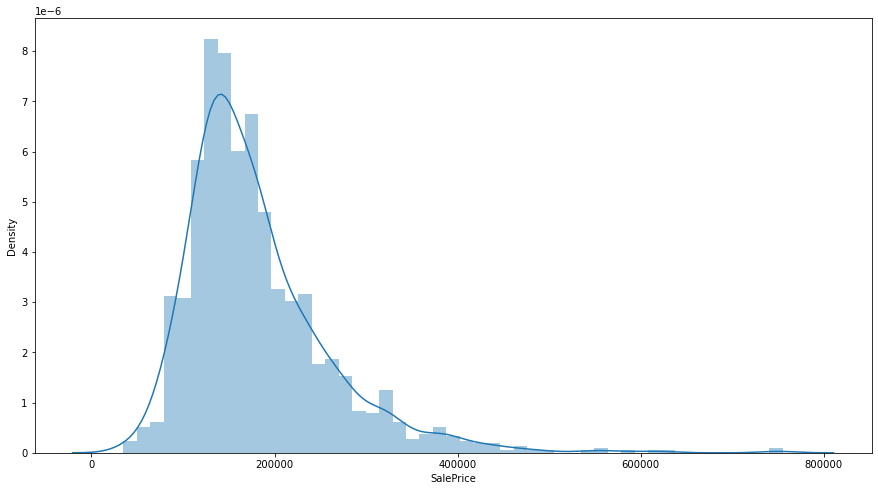

In [15]:
## Analyse the target variable 'SalePrice' and check it's skewness
plt.figure(figsize=[15,8])
sns.distplot(df_sh.SalePrice);

<div class="alert alert-info" role="alert">
    <strong>Observation:</strong> The target variable `SalePrice` is skewed from the right
</div>

In [16]:
## Check the skewness of target variable "SalesPrice"
print("Skewness:", df_sh.SalePrice.skew())

Skewness: 1.8828757597682129


<div class="alert alert-info" role="alert">
    <strong>Observation:</strong> Skewness is greater than 1. The target variable is highly skewed from the right. We will perform log transformation to have normal/near normal distribution.
</div>

In [17]:
## Log transform the target variable
df_sh.SalePrice = np.log(df_sh.SalePrice)

In [18]:
## Check the skewness of target variable "SalesPrice" after log transform
print("Skewness:", df_sh.SalePrice.skew())

Skewness: 0.12133506220520406


<div class="alert alert-info" role="alert">
    <strong>Observation:</strong> Skewness is less than 1 now.
</div>

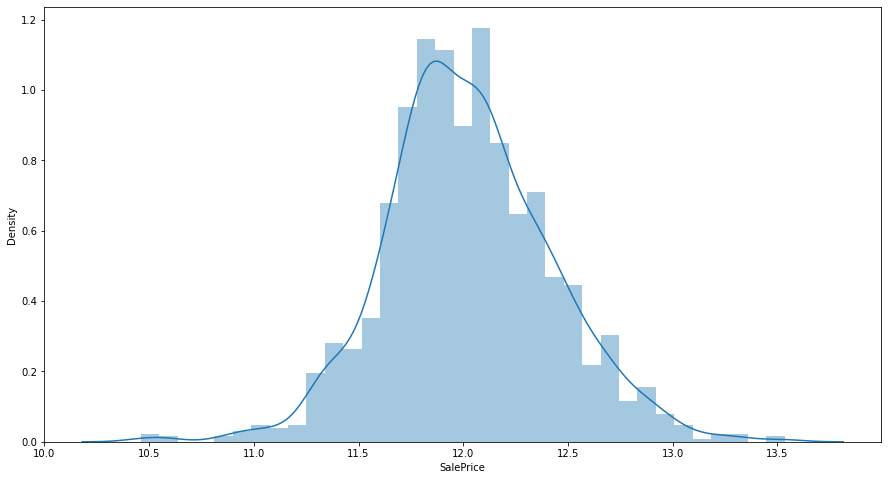

In [19]:
## Plot the spread of transformed target variable
plt.figure(figsize=[15,8])
sns.distplot(df_sh.SalePrice);

<div class="alert alert-info" role="alert">
    <strong>Observation:</strong> Target variable has normal distribution now.
</div>

In [20]:
## Get numerical and categorical columns for EDA
## Extract numerical columns
df_num = df_sh.select_dtypes(include=['int64', 'float64'])
df_num.head()

,Id,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,65.0,8450,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2,548,0,61,0,0,0,0,0,2,2008,12.247694
1,2,80.0,9600,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,2,460,298,0,0,0,0,0,0,5,2007,12.109011
2,3,68.0,11250,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2,608,0,42,0,0,0,0,0,9,2008,12.317167
3,4,60.0,9550,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,3,642,0,35,272,0,0,0,0,2,2006,11.849398
4,5,84.0,14260,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,3,836,192,84,0,0,0,0,0,12,2008,12.429216


In [21]:
## Extract categorical columns
df_cat = df_sh.select_dtypes(include='object')
df_cat.head()

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,60,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,None,Attchd,2003,RFn,TA,TA,Y,None,None,None,WD,Normal
1,20,RL,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,1976,RFn,TA,TA,Y,None,None,None,WD,Normal
2,60,RL,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,2001,RFn,TA,TA,Y,None,None,None,WD,Normal
3,70,RL,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,1998,Unf,TA,TA,Y,None,None,None,WD,Abnorml
4,60,RL,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,2000,RFn,TA,TA,Y,None,None,None,WD,Normal


## EDA on Numerical Columns

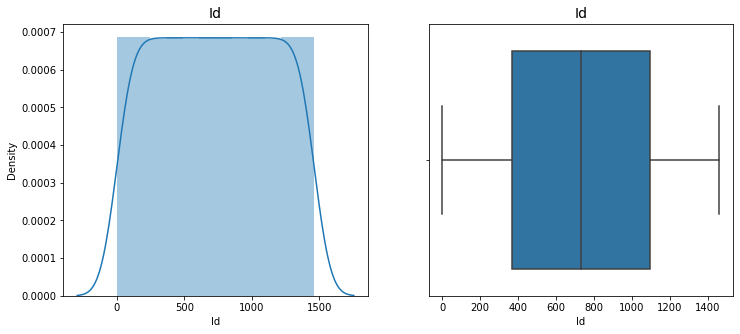

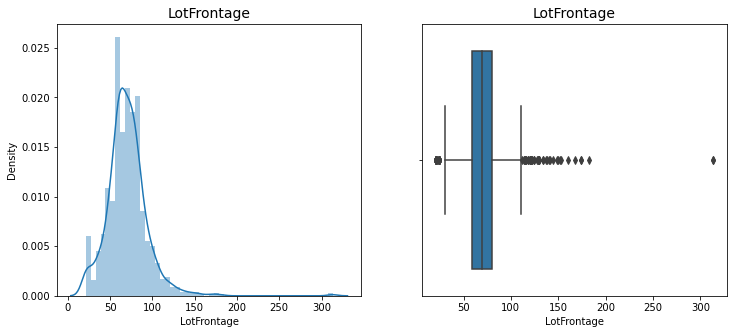

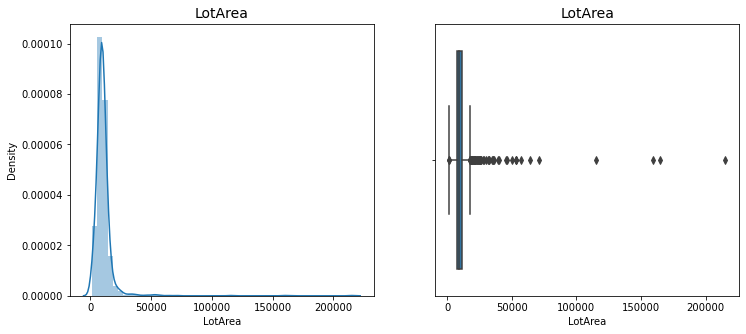

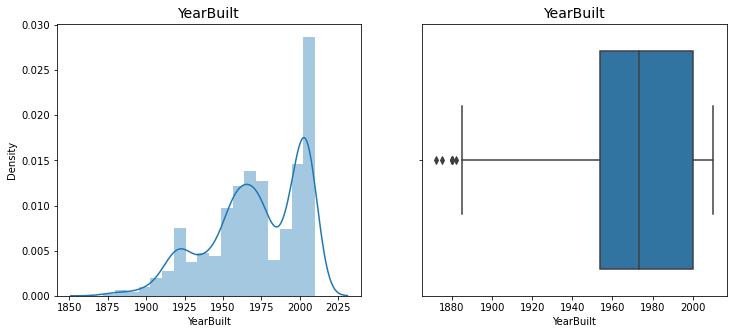

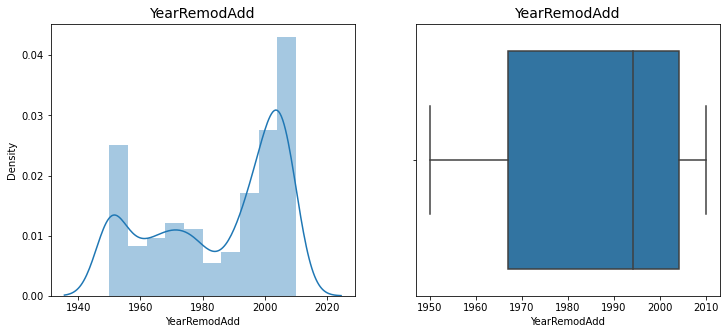

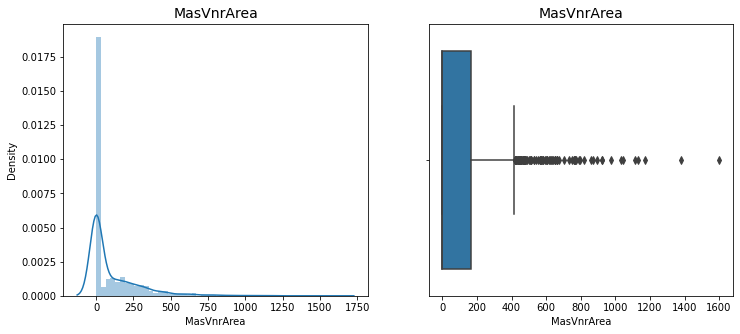

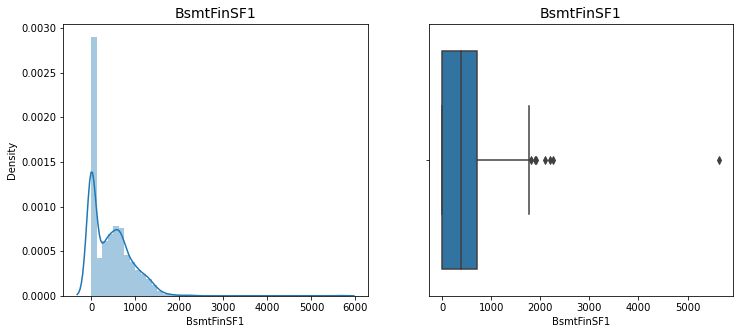

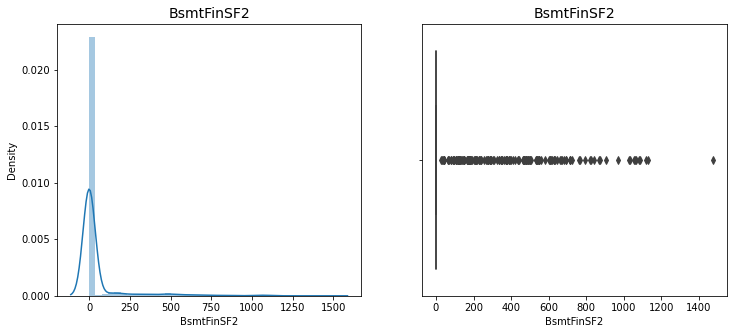

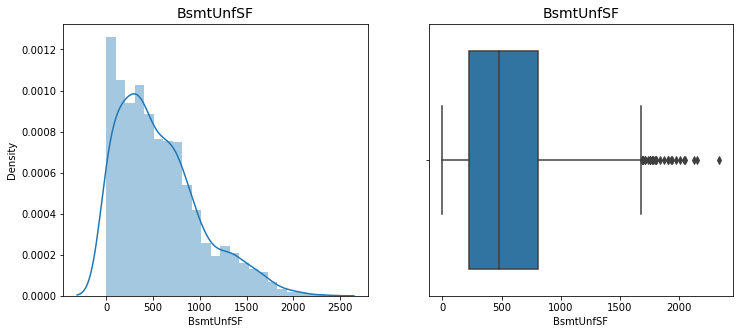

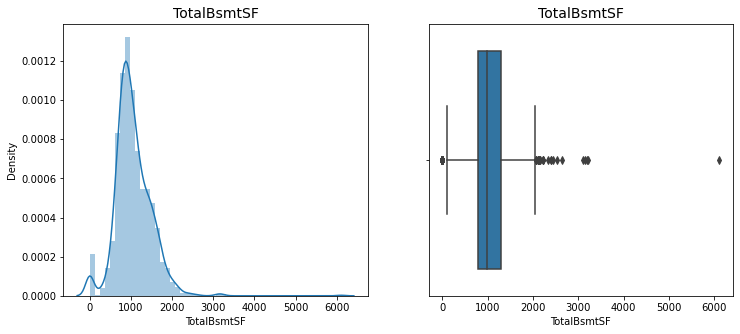

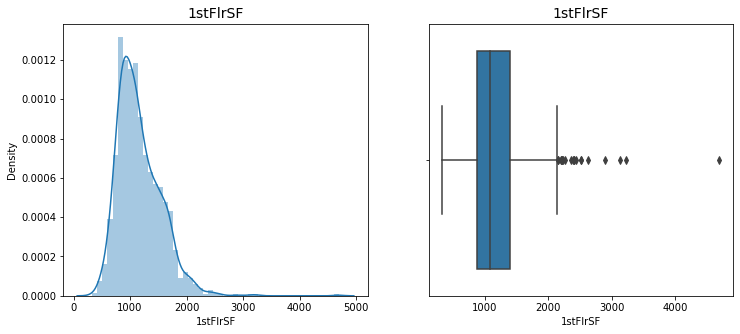

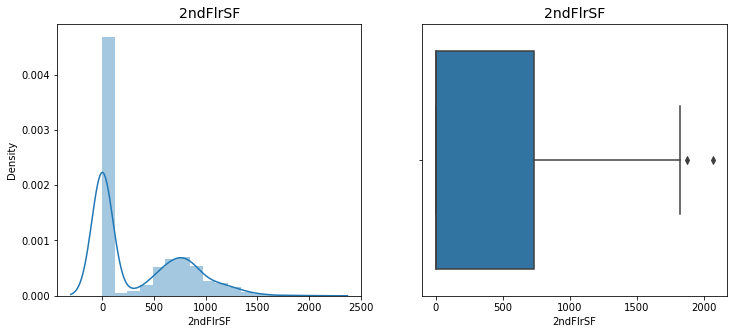

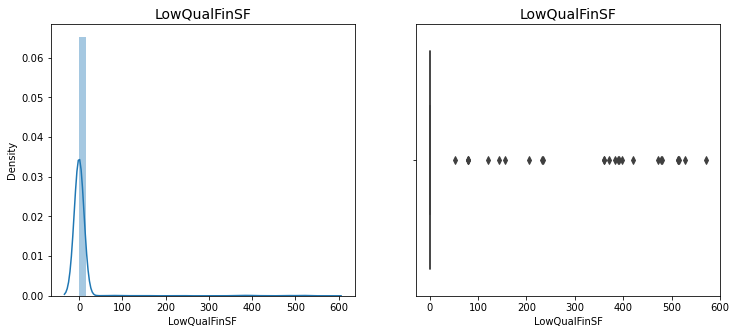

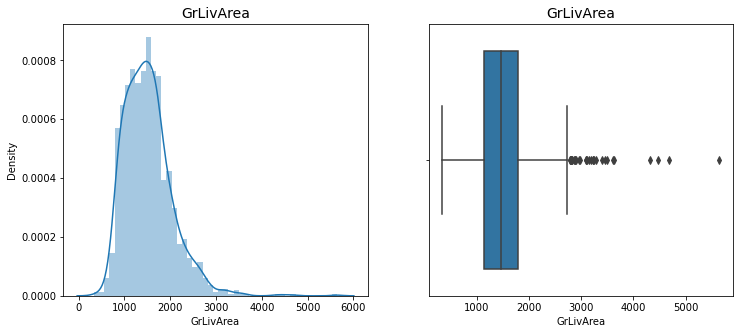

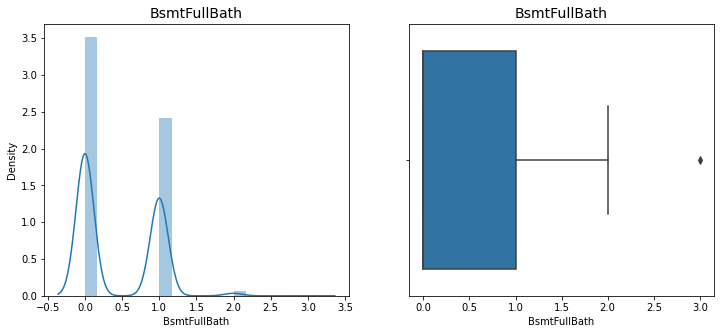

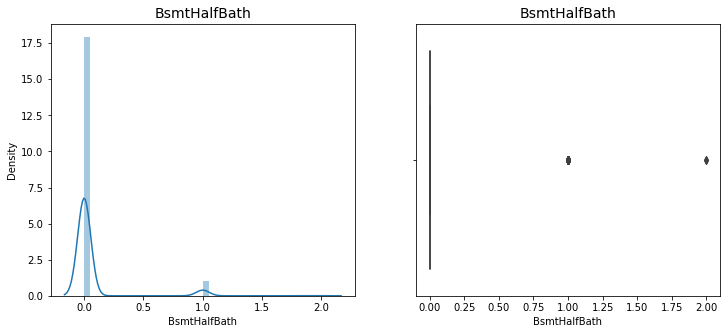

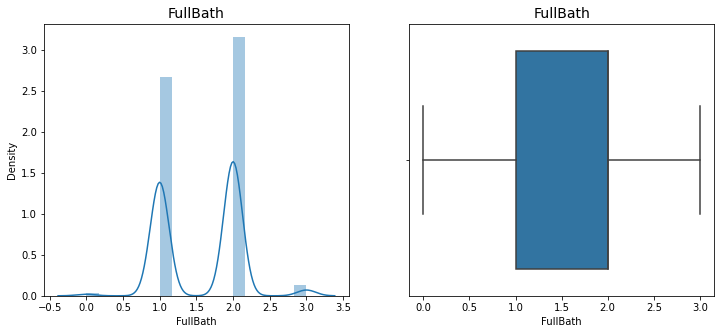

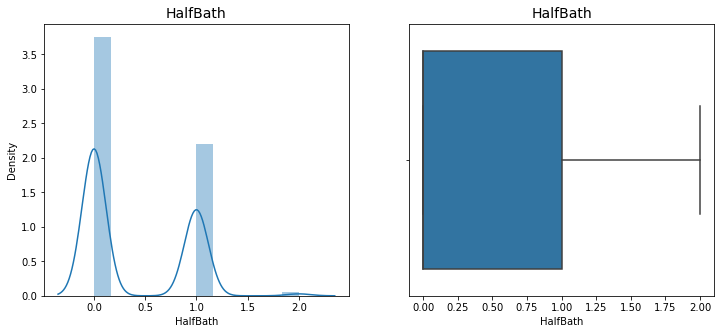

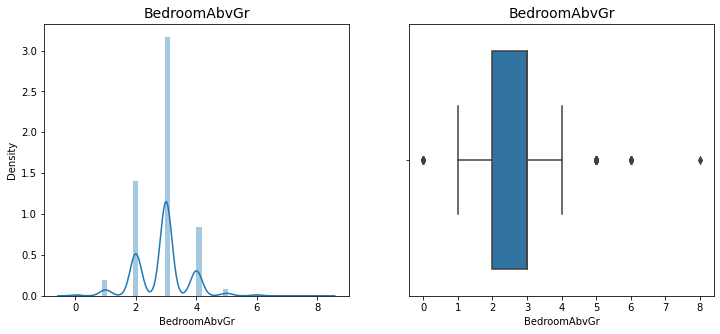

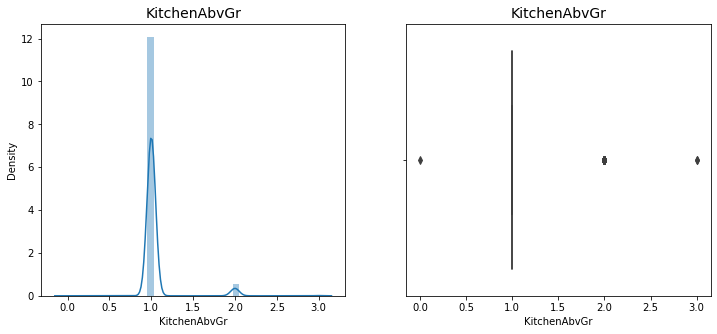

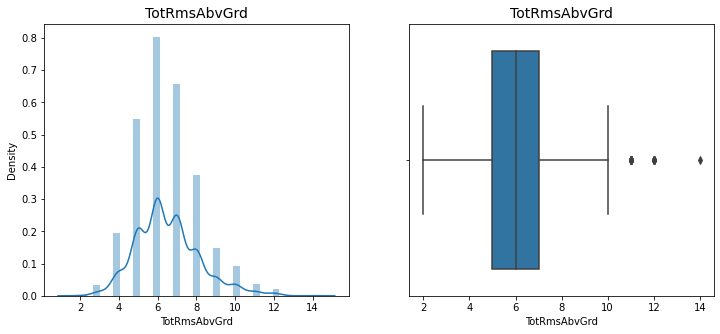

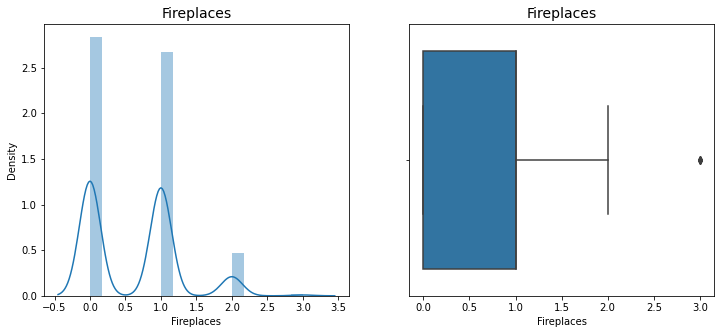

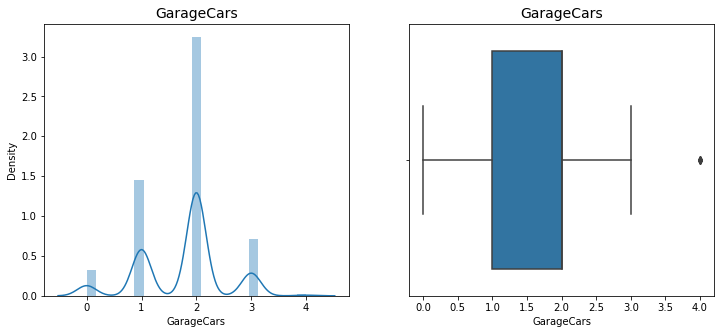

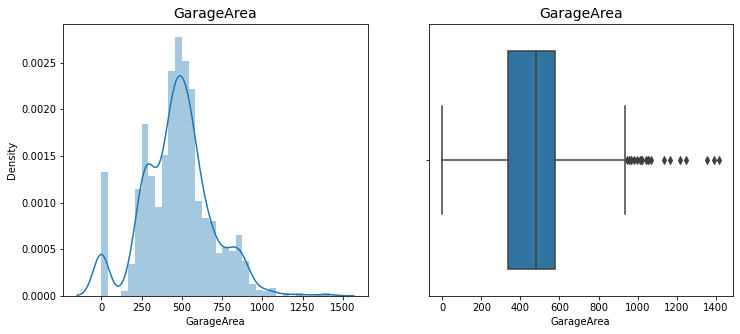

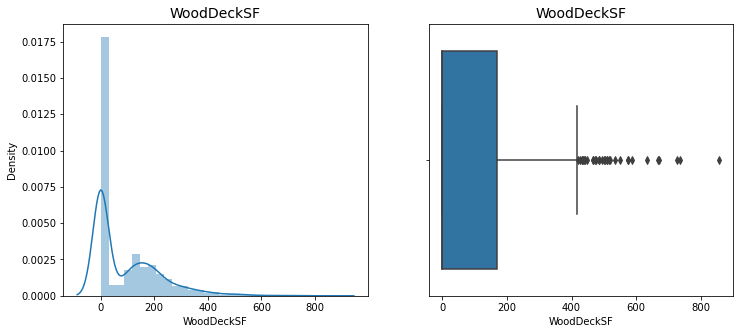

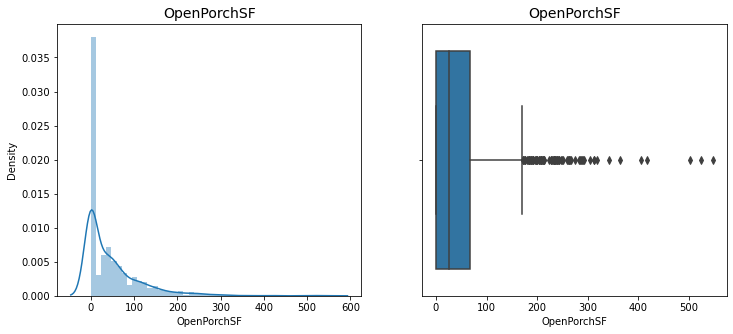

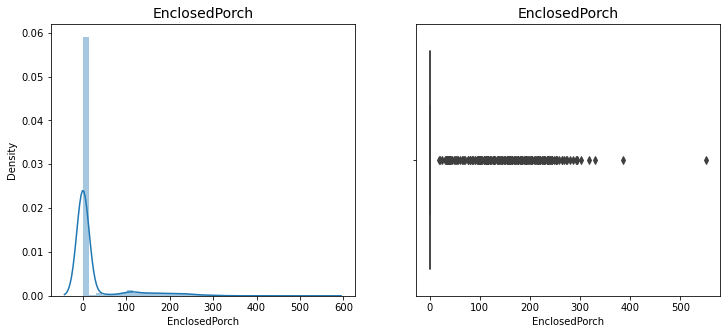

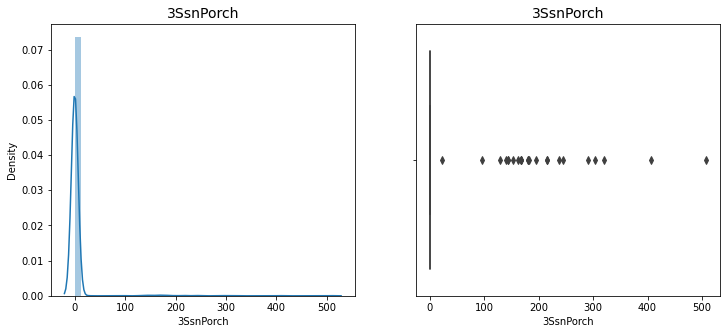

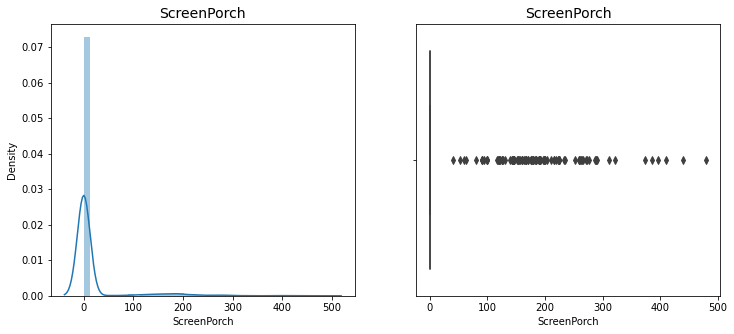

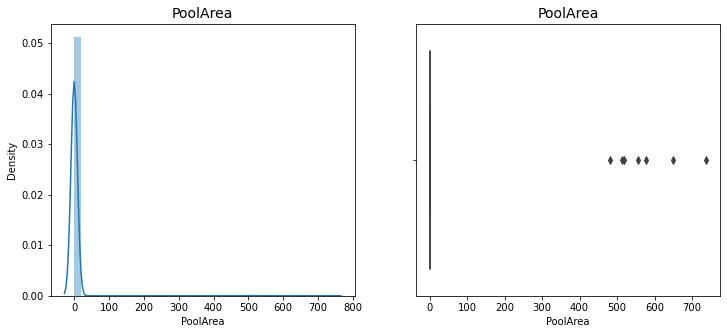

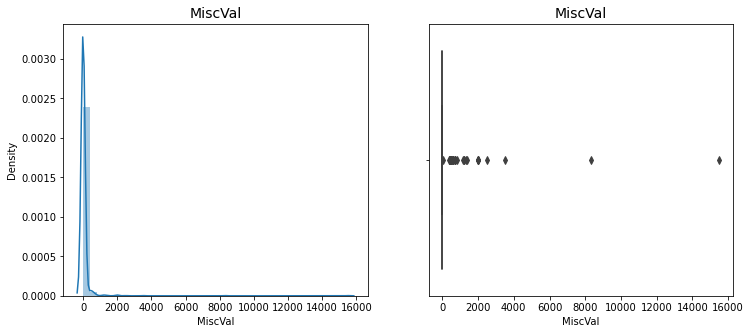

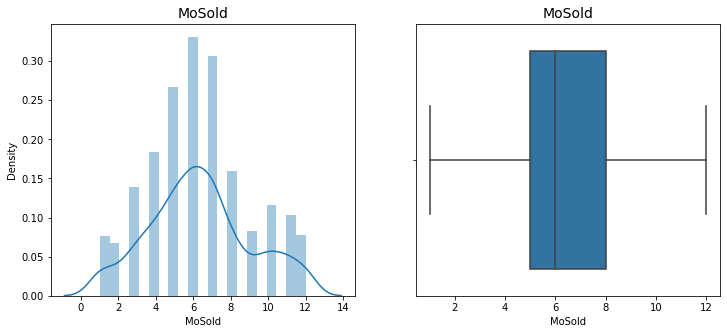

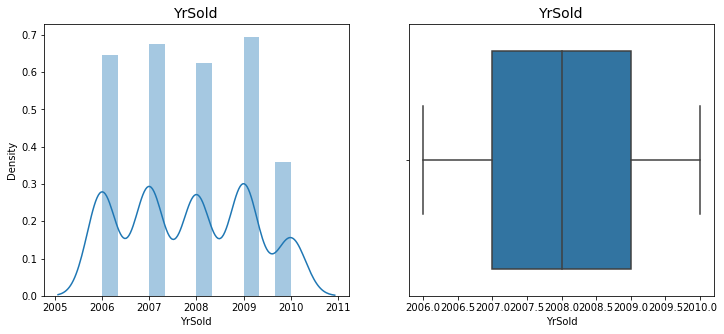

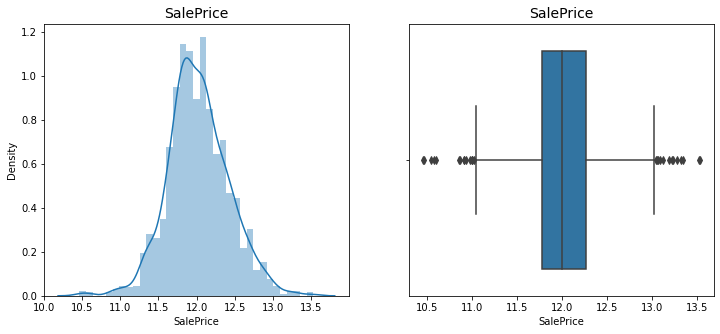

In [22]:
## Plot histograms and boxplots to view the distribution of numeric variables
for col in df_num.columns:
    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    plt.title(col, fontdict={'fontsize': 14})
    sns.distplot(df_num[col])
    
    plt.subplot(1,2,2)
    plt.title(col, fontdict={'fontsize': 14})
    sns.boxplot(df_num[col])
    plt.show()

<div class="alert alert-info" role="alert">
    <strong>Observations:</strong>
    <ul>
        <li>Abnormal distribution with many numerical columns</li>
        <li>Presence of outliers in many numerical columns, outliers will need to be handled</li>
    </ul>
</div>

## EDA on Categorical Columns

In [23]:
## Get unique values of all Categorical columns
for col in df_cat.columns:
    print(col)
    print(df_sh[col].unique())


MSSubClass
[60 20 70 50 190 45 90 120 30 85 80 160 75 180 40]
MSZoning
['RL' 'RM' 'C (all)' 'FV' 'RH']
Street
['Pave' 'Grvl']
Alley
['None' 'Grvl' 'Pave']
LotShape
['Reg' 'IR1' 'IR2' 'IR3']
LandContour
['Lvl' 'Bnk' 'Low' 'HLS']
Utilities
['AllPub' 'NoSeWa']
LotConfig
['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
LandSlope
['Gtl' 'Mod' 'Sev']
Neighborhood
['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
Condition1
['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
Condition2
['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
BldgType
['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
HouseStyle
['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
OverallQual
[7 6 8 5 9 4 10 3 1 2]
OverallCond
[5 8 6 7 4 2 3 9 1]
RoofStyle
['Gable' 'Hip' 'Gambrel' 'Mansard' 'F

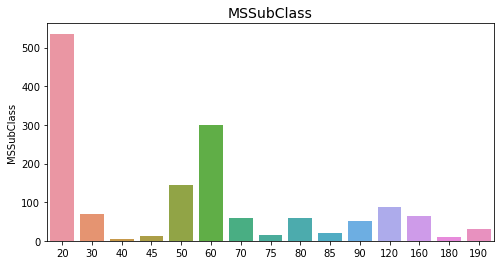

20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64


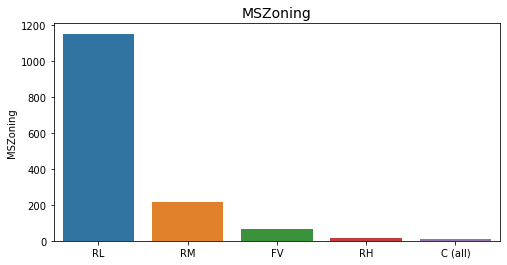

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64


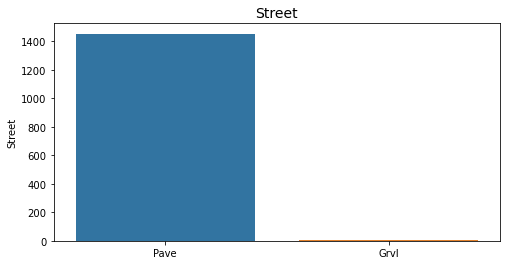

Pave    1454
Grvl       6
Name: Street, dtype: int64


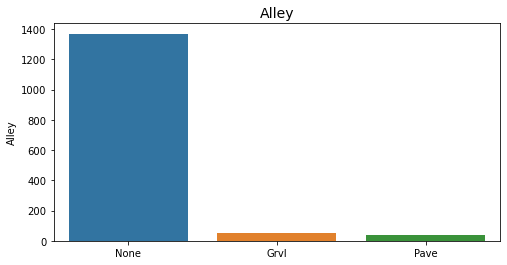

None    1369
Grvl      50
Pave      41
Name: Alley, dtype: int64


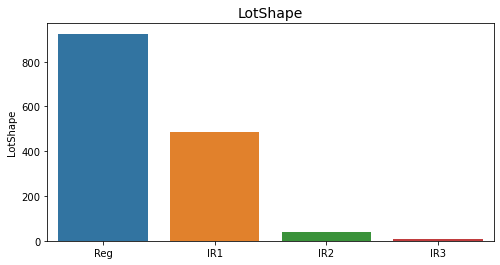

Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64


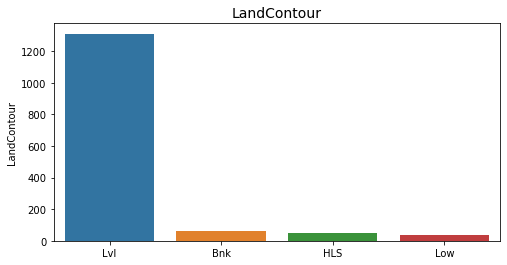

Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64


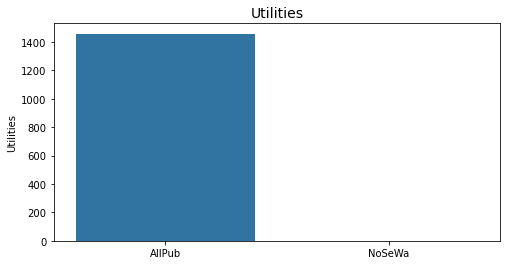

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64


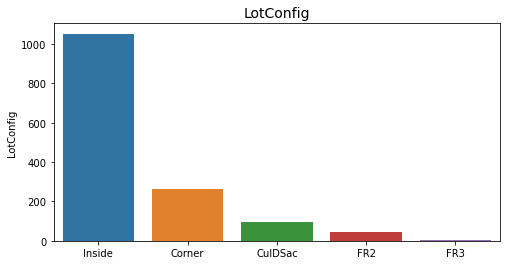

Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64


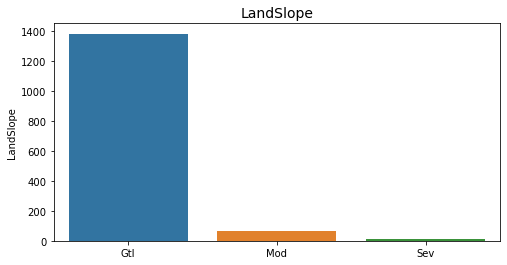

Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64


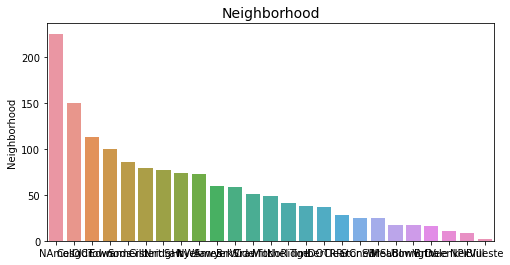

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64


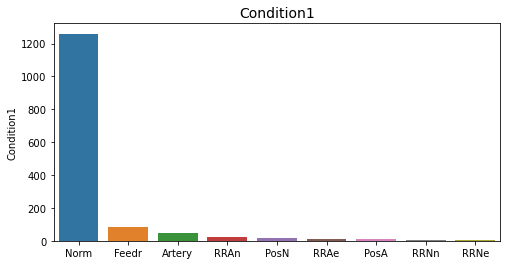

Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: Condition1, dtype: int64


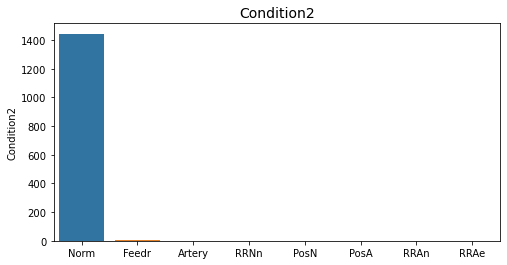

Norm      1445
Feedr        6
Artery       2
RRNn         2
PosN         2
PosA         1
RRAn         1
RRAe         1
Name: Condition2, dtype: int64


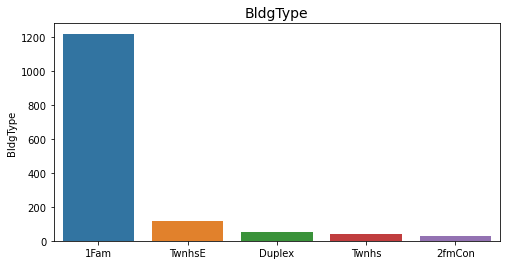

1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: BldgType, dtype: int64


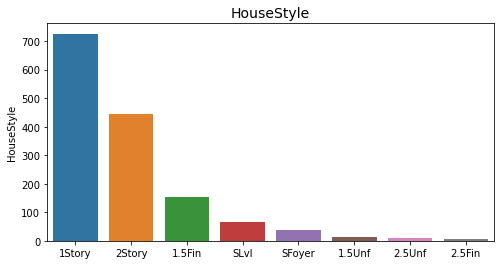

1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: HouseStyle, dtype: int64


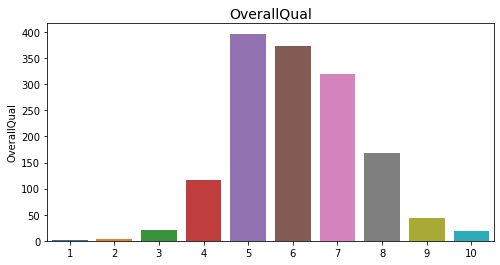

5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: OverallQual, dtype: int64


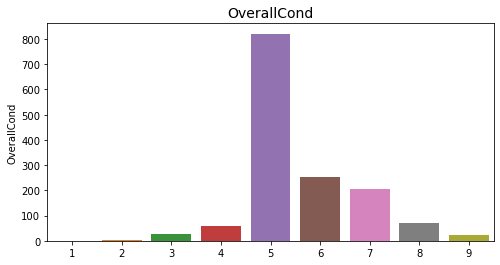

5    821
6    252
7    205
8     72
4     57
3     25
9     22
2      5
1      1
Name: OverallCond, dtype: int64


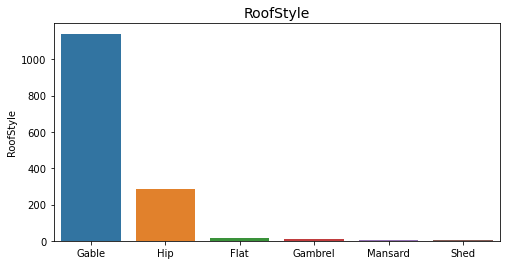

Gable      1141
Hip         286
Flat         13
Gambrel      11
Mansard       7
Shed          2
Name: RoofStyle, dtype: int64


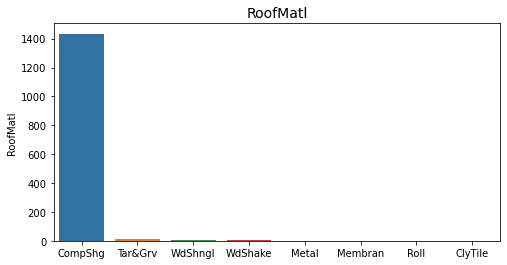

CompShg    1434
Tar&Grv      11
WdShngl       6
WdShake       5
Metal         1
Membran       1
Roll          1
ClyTile       1
Name: RoofMatl, dtype: int64


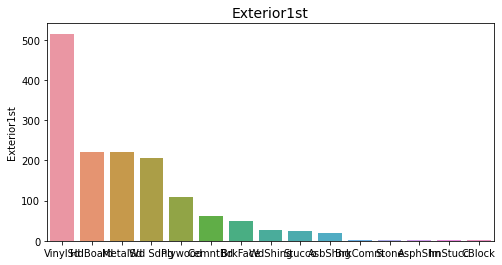

VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
BrkComm      2
Stone        2
AsphShn      1
ImStucc      1
CBlock       1
Name: Exterior1st, dtype: int64


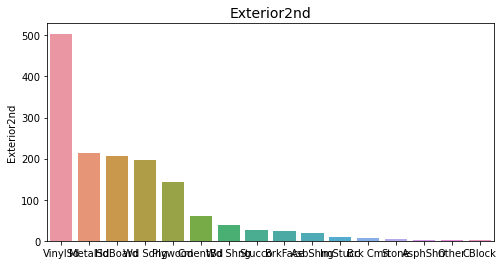

VinylSd    504
MetalSd    214
HdBoard    207
Wd Sdng    197
Plywood    142
CmentBd     60
Wd Shng     38
Stucco      26
BrkFace     25
AsbShng     20
ImStucc     10
Brk Cmn      7
Stone        5
AsphShn      3
Other        1
CBlock       1
Name: Exterior2nd, dtype: int64


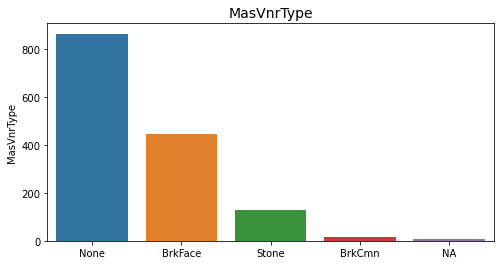

None       864
BrkFace    445
Stone      128
BrkCmn      15
NA           8
Name: MasVnrType, dtype: int64


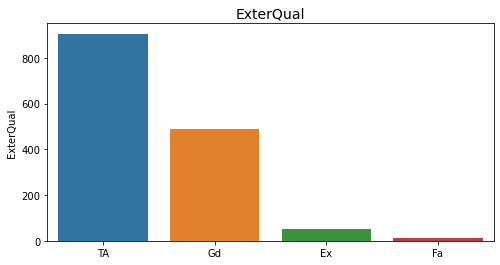

TA    906
Gd    488
Ex     52
Fa     14
Name: ExterQual, dtype: int64


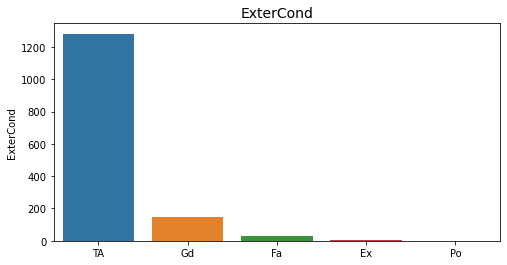

TA    1282
Gd     146
Fa      28
Ex       3
Po       1
Name: ExterCond, dtype: int64


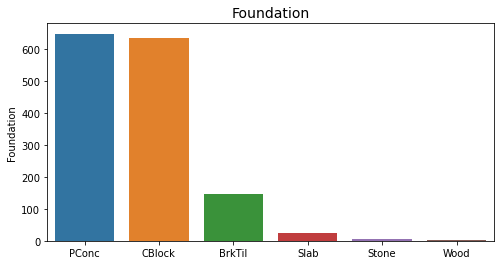

PConc     647
CBlock    634
BrkTil    146
Slab       24
Stone       6
Wood        3
Name: Foundation, dtype: int64


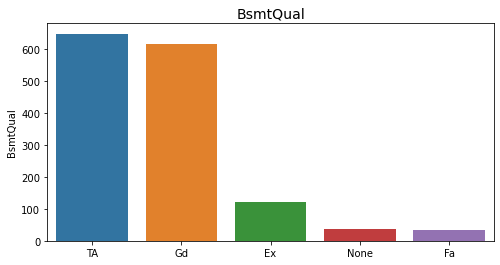

TA      649
Gd      618
Ex      121
None     37
Fa       35
Name: BsmtQual, dtype: int64


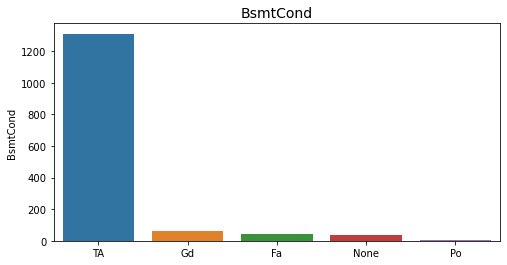

TA      1311
Gd        65
Fa        45
None      37
Po         2
Name: BsmtCond, dtype: int64


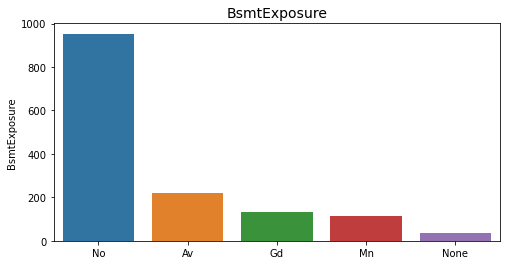

No      953
Av      221
Gd      134
Mn      114
None     38
Name: BsmtExposure, dtype: int64


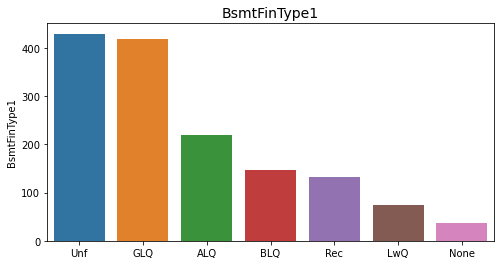

Unf     430
GLQ     418
ALQ     220
BLQ     148
Rec     133
LwQ      74
None     37
Name: BsmtFinType1, dtype: int64


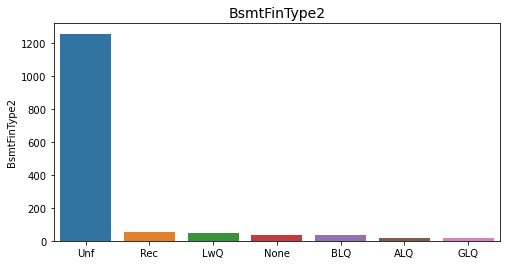

Unf     1256
Rec       54
LwQ       46
None      38
BLQ       33
ALQ       19
GLQ       14
Name: BsmtFinType2, dtype: int64


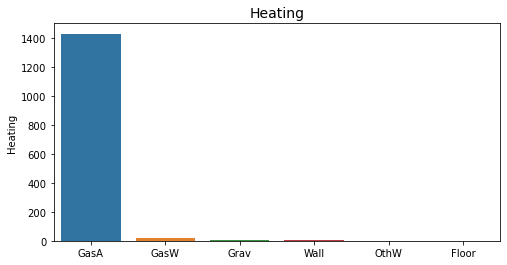

GasA     1428
GasW       18
Grav        7
Wall        4
OthW        2
Floor       1
Name: Heating, dtype: int64


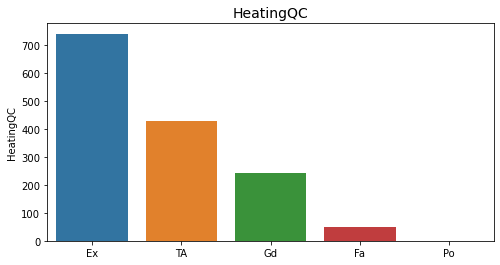

Ex    741
TA    428
Gd    241
Fa     49
Po      1
Name: HeatingQC, dtype: int64


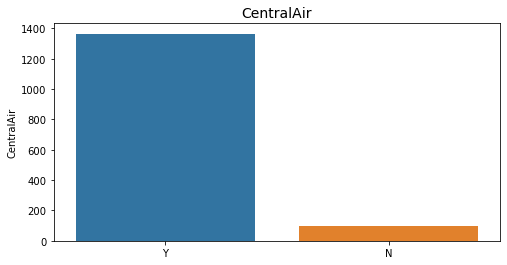

Y    1365
N      95
Name: CentralAir, dtype: int64


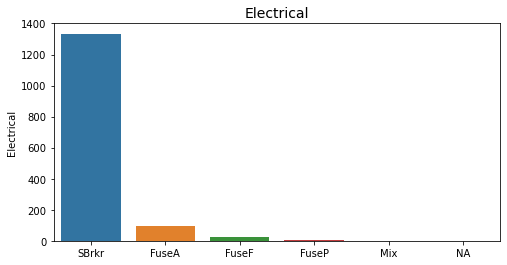

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
NA          1
Name: Electrical, dtype: int64


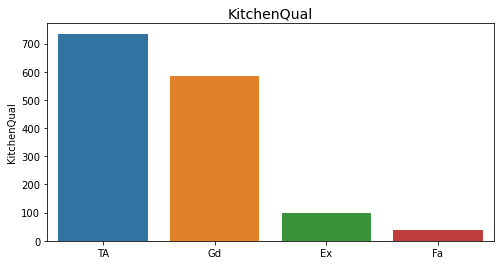

TA    735
Gd    586
Ex    100
Fa     39
Name: KitchenQual, dtype: int64


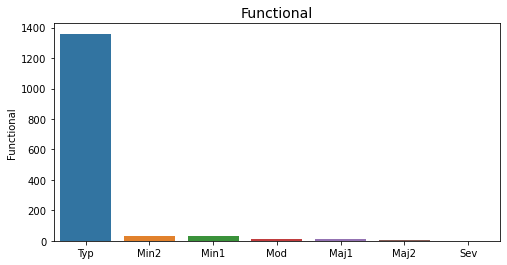

Typ     1360
Min2      34
Min1      31
Mod       15
Maj1      14
Maj2       5
Sev        1
Name: Functional, dtype: int64


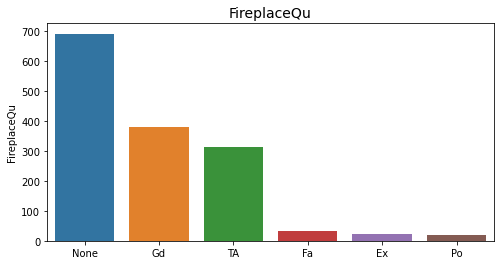

None    690
Gd      380
TA      313
Fa       33
Ex       24
Po       20
Name: FireplaceQu, dtype: int64


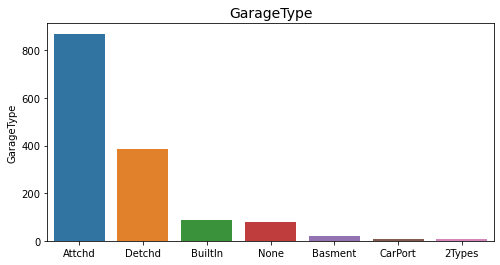

Attchd     870
Detchd     387
BuiltIn     88
None        81
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64


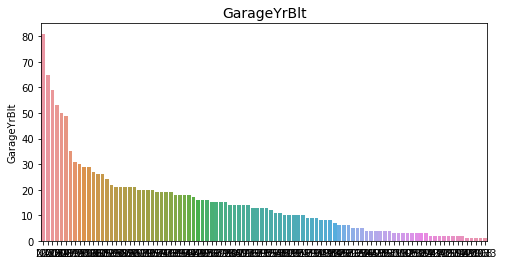

NA      81
2005    65
2006    59
2004    53
2003    50
2007    49
1977    35
1998    31
1999    30
1976    29
2008    29
2000    27
1968    26
2002    26
1950    24
1993    22
1958    21
1966    21
2009    21
1965    21
1962    21
2001    20
1970    20
1996    20
1957    20
1954    19
1997    19
1978    19
1960    19
1995    18
1994    18
1974    18
1964    18
1959    17
1990    16
1963    16
1956    16
1967    15
1969    15
1979    15
1980    15
1988    14
1940    14
1920    14
1972    14
1973    14
1961    13
1971    13
1992    13
1955    13
1953    12
1948    11
1987    11
1989    10
1925    10
1981    10
1985    10
1941    10
1939     9
1991     9
1975     9
1949     8
1930     8
1984     8
1983     7
1926     6
1951     6
1986     6
1916     5
1922     5
1936     5
1945     4
1946     4
1928     4
1935     4
1982     4
1931     4
1910     3
2010     3
1932     3
1923     3
1952     3
1938     3
1924     3
1921     3
1947     2
1937     2
1942     2
1915     2
1918     2
1934     2

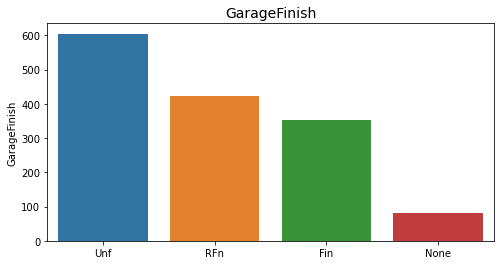

Unf     605
RFn     422
Fin     352
None     81
Name: GarageFinish, dtype: int64


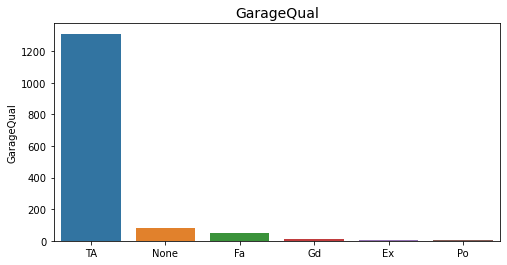

TA      1311
None      81
Fa        48
Gd        14
Ex         3
Po         3
Name: GarageQual, dtype: int64


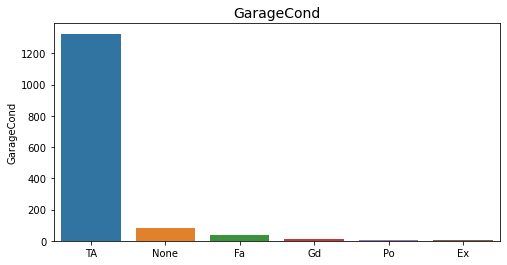

TA      1326
None      81
Fa        35
Gd         9
Po         7
Ex         2
Name: GarageCond, dtype: int64


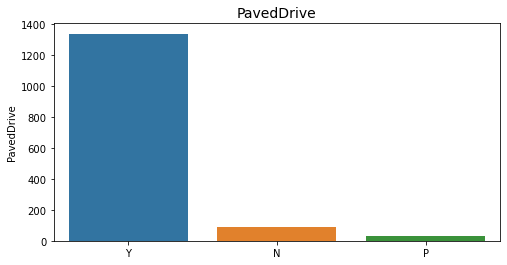

Y    1340
N      90
P      30
Name: PavedDrive, dtype: int64


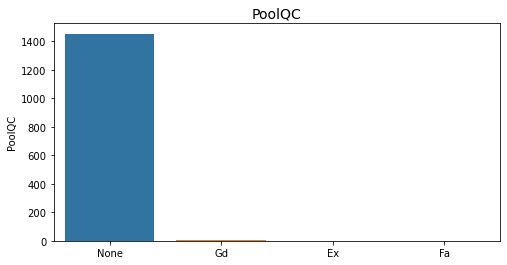

None    1453
Gd         3
Ex         2
Fa         2
Name: PoolQC, dtype: int64


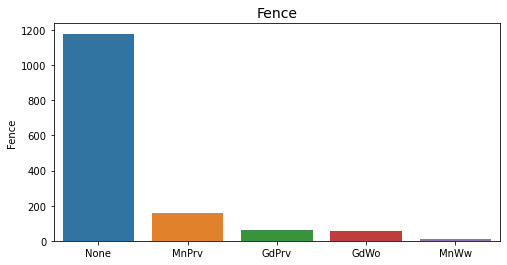

None     1179
MnPrv     157
GdPrv      59
GdWo       54
MnWw       11
Name: Fence, dtype: int64


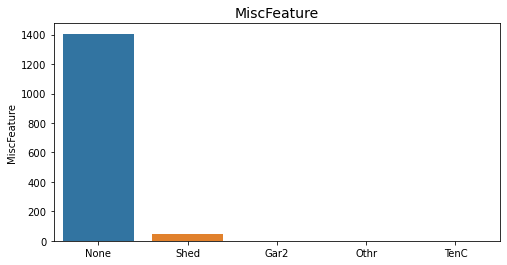

None    1406
Shed      49
Gar2       2
Othr       2
TenC       1
Name: MiscFeature, dtype: int64


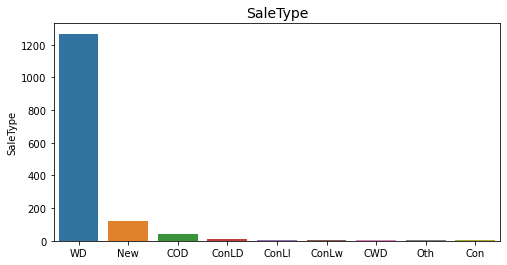

WD       1267
New       122
COD        43
ConLD       9
ConLI       5
ConLw       5
CWD         4
Oth         3
Con         2
Name: SaleType, dtype: int64


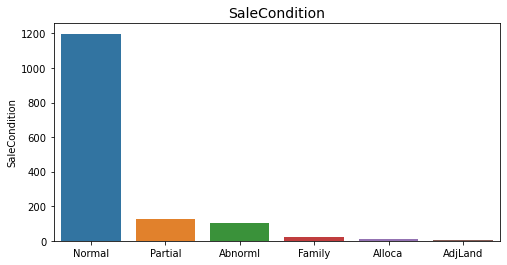

Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64


In [24]:
## Plot bar graph to see the levels of categorical columns
for col in df_cat.columns:
    plt.figure(figsize=(8,4))
    plt.title(col, fontdict={'fontsize': 14})
    sns.barplot(df_cat[col].value_counts().index, df_cat[col].value_counts())
    plt.show()
    print(df_cat[col].value_counts())

<div class="alert alert-info" role="alert">
    <strong>Observation:</strong>
    <ul>
        <li>All columns are having more than one values. There is no column with single unique value that we could remove.</li>
    </ul>
</div> 

<h3>Bivariate Analysis</h3>

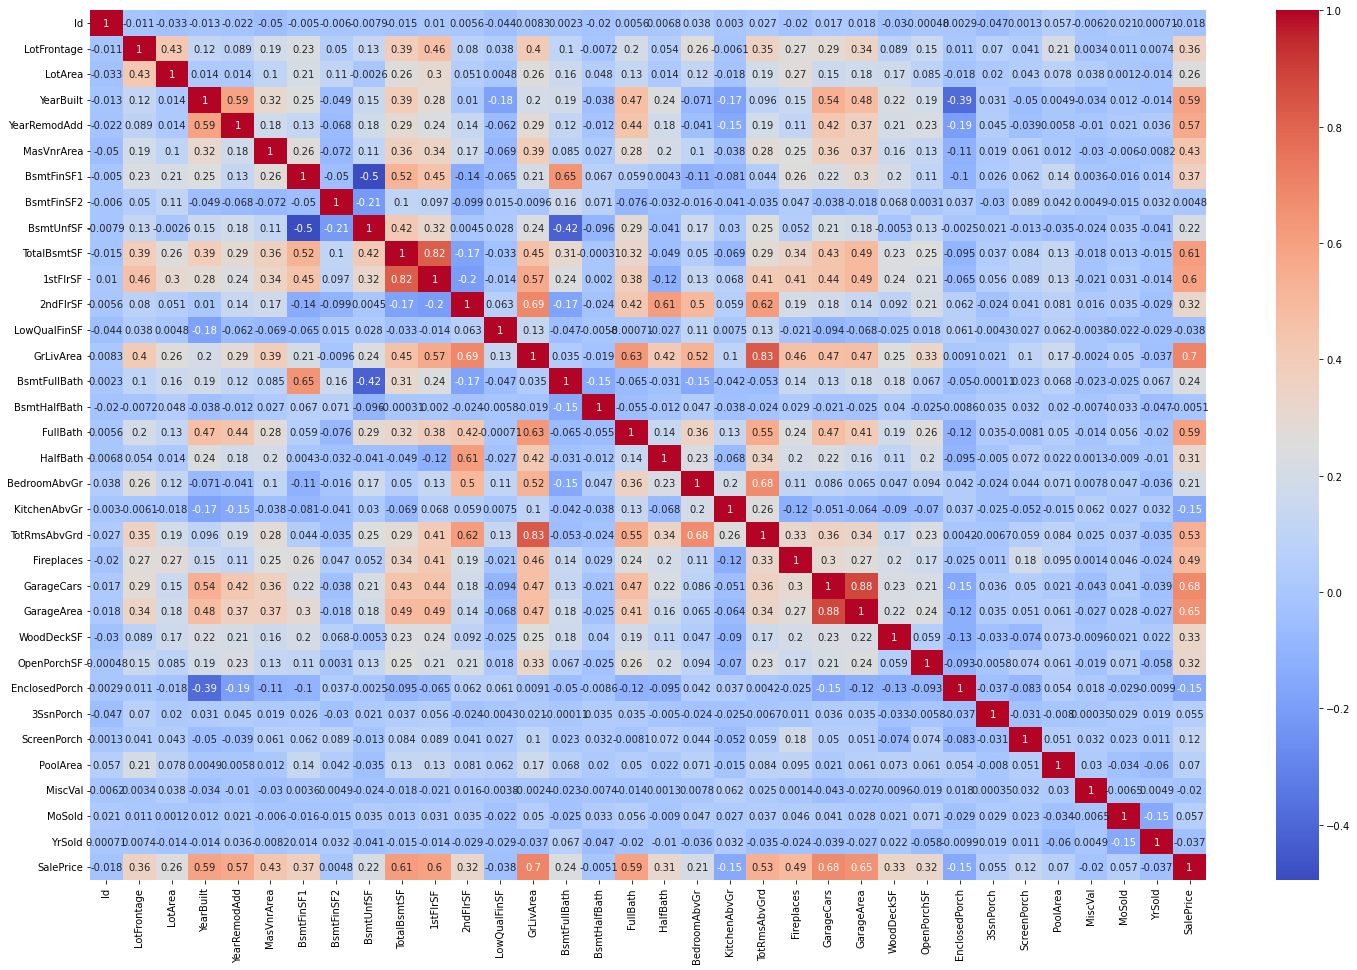

In [25]:
# Check correlations among numerical variables using heatmap 
plt.figure(figsize=(25,16))
sns.heatmap(df_num.corr(), annot=True, cmap='coolwarm'); 

<div class="alert alert-info" role="alert">
    <strong>Observations:</strong>
    <ul>
        <li>High correlation among many columns</li>
        <li>Target variable "SalePrice" is highly correlated with GrLivArea, GarageCars and GarageArea (0.7, 0.68 and 0.65 respectively)</li>
        <li>There is multicollinearity among predictors in the data - Ridge regression would be good model for this</li>
    </ul>
</div> 

<h2>3. Feature Preparation</h2>

In [26]:
## Add a new column for age of the house
df_sh['Age'] = df_sh.YrSold - df_sh.YearBuilt

In [27]:
## Drop YrSold and YearBuilt columns as these are no more required
df_sh.drop(['YrSold', 'YearBuilt'], axis=1, inplace=True)

In [28]:
## Check dataframe again
df_sh.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,SaleType,SaleCondition,SalePrice,Age
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,None,Attchd,2003,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,None,None,None,0,2,WD,Normal,12.247694,5
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,None,None,None,0,5,WD,Normal,12.109011,31
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,None,None,None,0,9,WD,Normal,12.317167,7
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,None,None,None,0,2,WD,Abnorml,11.849398,91
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,None,None,None,0,12,WD,Normal,12.429216,8


<h2>4. Data Pre-processing</h2>
<h3>Missing Value Treatment</h3>

In [29]:
## View the missing values in all features
df_sh.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
Alley              0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         0
MasVnrArea         8
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual           0
BsmtCond           0
BsmtExposure       0
BsmtFinType1       0
BsmtFinSF1         0
BsmtFinType2       0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath 

<div class="alert alert-info" role="alert">
    <strong>Observation:</strong>
    <ul>
        <li>`LotFrontage` and `MasVnrArea` columns have missing values</li>
    </ul>
</div> 

In [30]:
## Replace missing values in these two columns with their median. Using median as there are some outliers in these fields
df_sh['LotFrontage'].fillna(df_sh['LotFrontage'].median(), inplace=True)
df_sh['MasVnrArea'].fillna(df_sh['MasVnrArea'].median(), inplace=True)


In [31]:
## Check for missing values again 
df_sh.isna().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual 

<div class="alert alert-info" role="alert">
    <strong>Observation:</strong>
    <ul>
        <li>Numeric fields don't have any missing values now.</li>
    </ul>
</div> 

<h3>Dummy Variable Creation</h3>

In [32]:
## Separate the categorical and numerical variables again from original dataframe
## (as we have added one feature and removed two from original data)
df_num = df_sh.select_dtypes(include=['int64', 'float64'])
df_cat = df_sh.select_dtypes(include='object')

In [33]:
## Dummy fields for categorical columns
df_cat_dummy = pd.get_dummies(df_cat, drop_first=True)
df_cat_dummy.head()

,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_None,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_NA,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_NA,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageYrBlt_1906,GarageYrBlt_1908,GarageYrBlt_1910,GarageYrBlt_1914,GarageYrBlt_1915,GarageYrBlt_1916,GarageYrBlt_1918,GarageYrBlt_1920,GarageYrBlt_1921,GarageYrBlt_1922,GarageYrBlt_1923,GarageYrBlt_1924,GarageYrBlt_1925,GarageYrBlt_1926,GarageYrBlt_1927,GarageYrBlt_1928,GarageYrBlt_1929,GarageYrBlt_1930,GarageYrBlt_1931,GarageYrBlt_1932,GarageYrBlt_1933,GarageYrBlt_1934,GarageYrBlt_1935,GarageYrBlt_1936,GarageYrBlt_1937,GarageYrBlt_1938,Garag

In [34]:
## Check the dataframe shape
df_cat_dummy.shape

(1460, 353)

<h3>Outlier treatment</h3>

<AxesSubplot:>

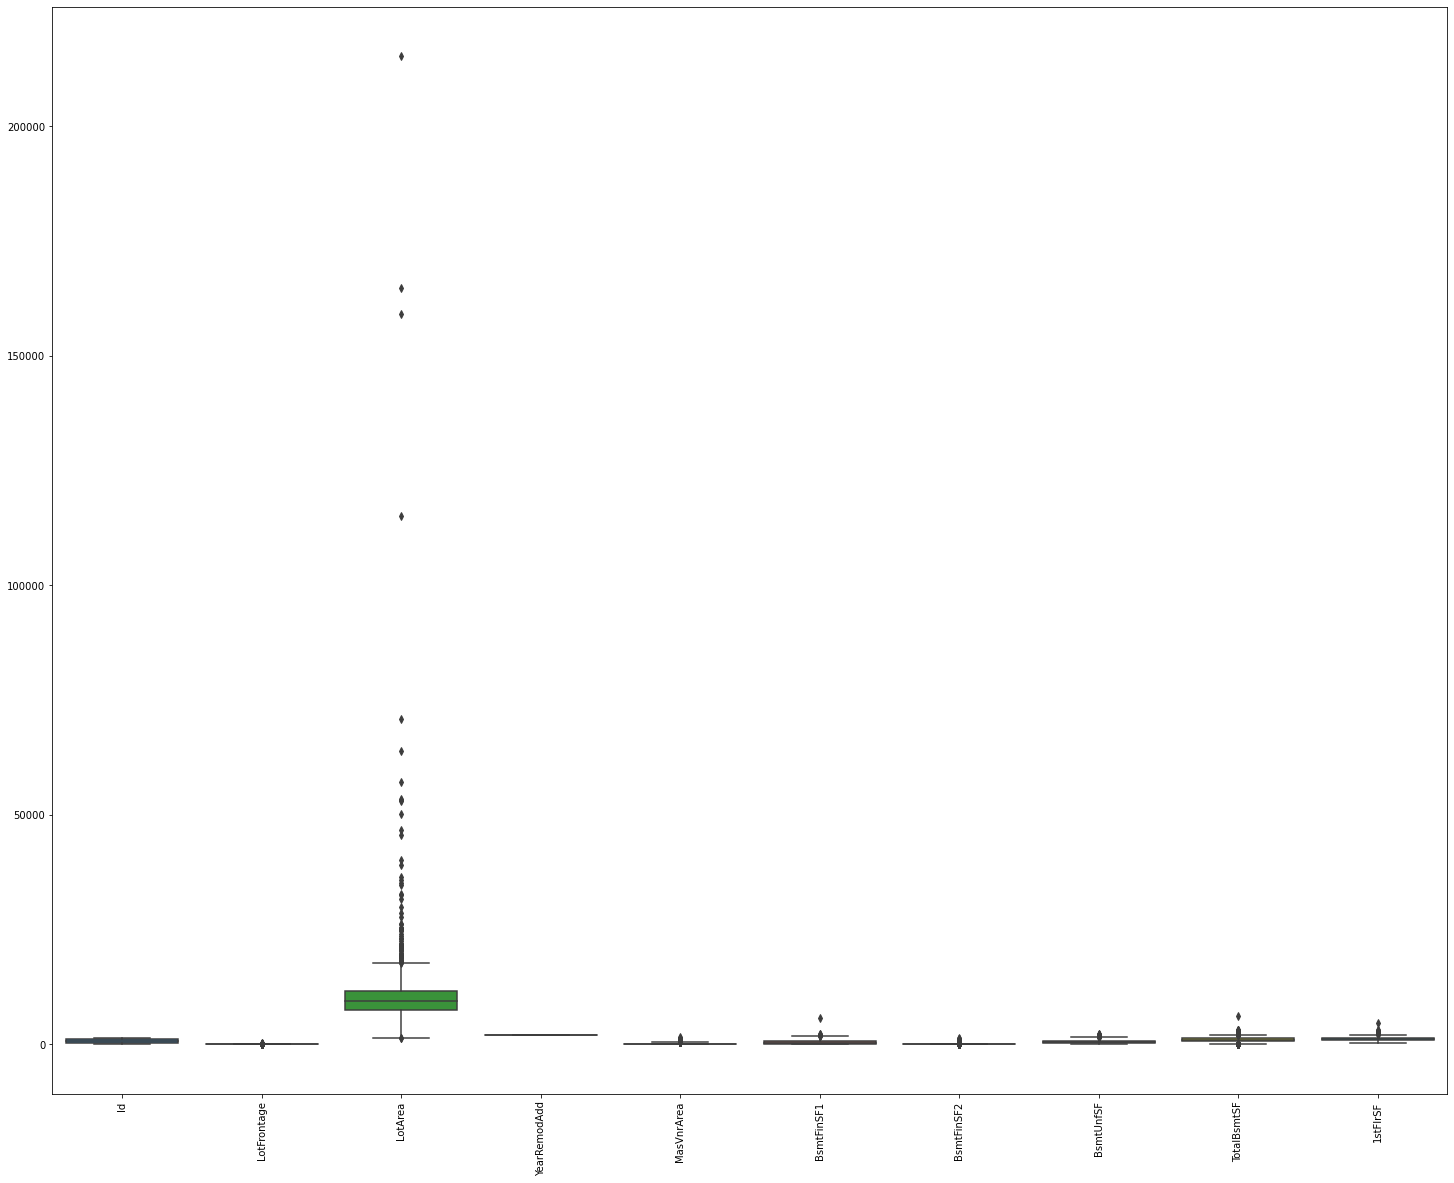

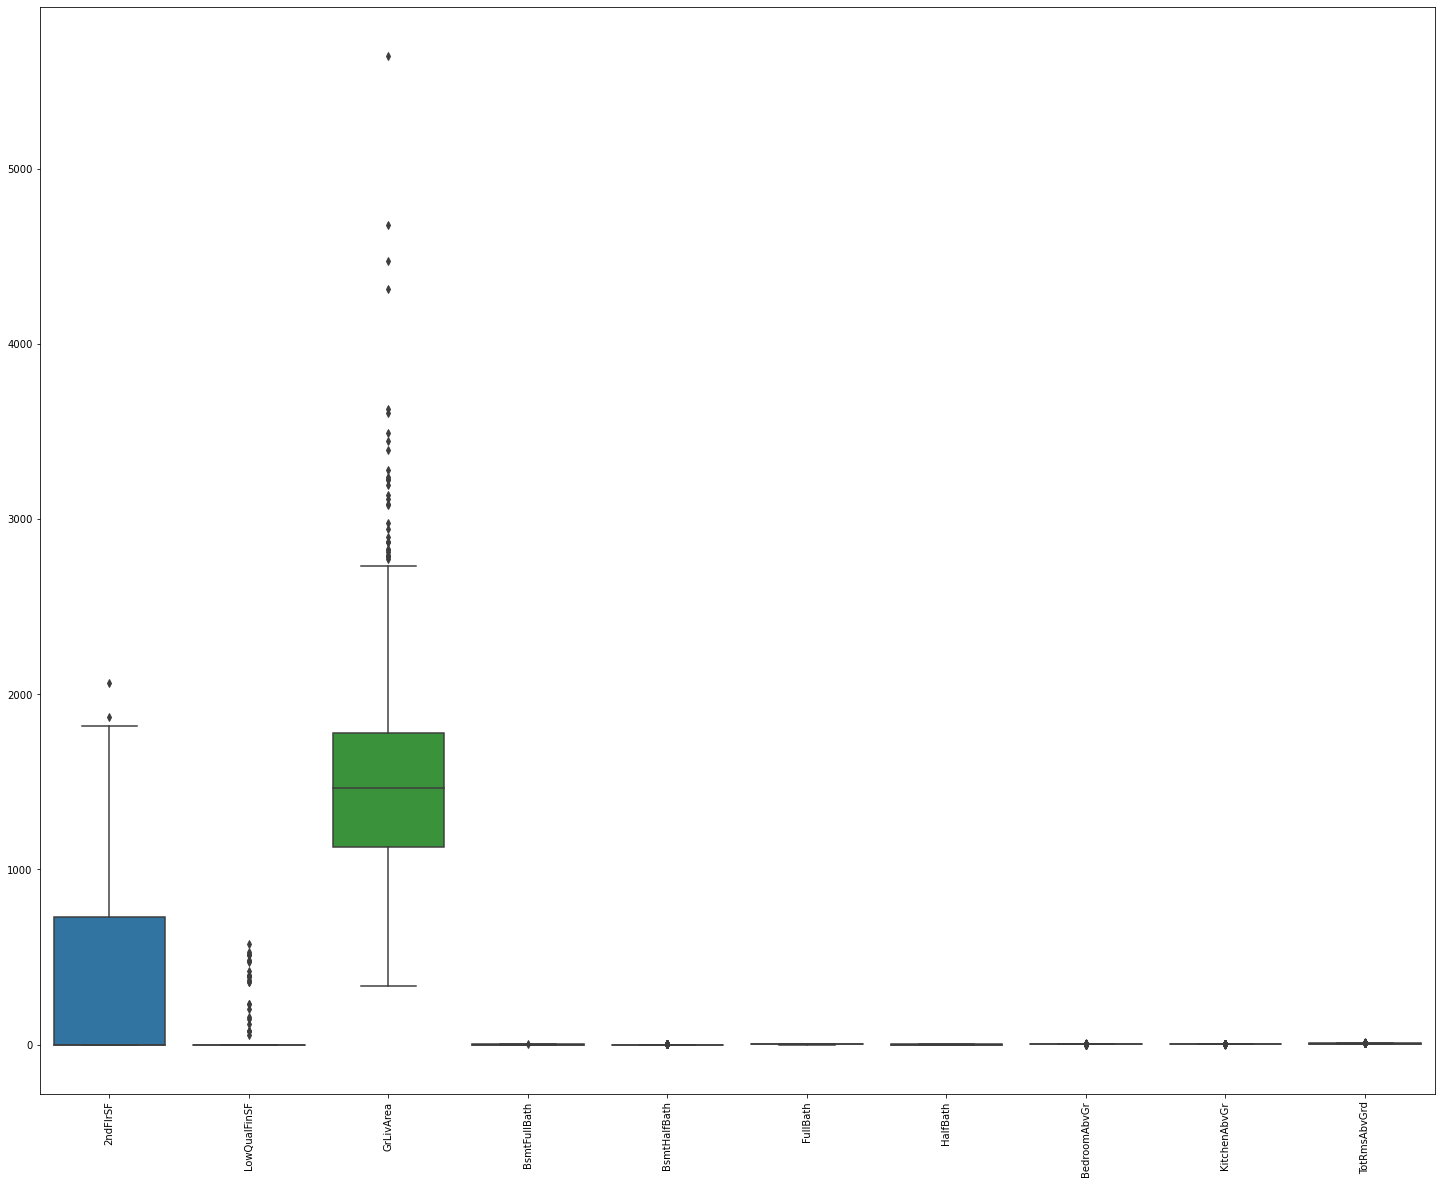

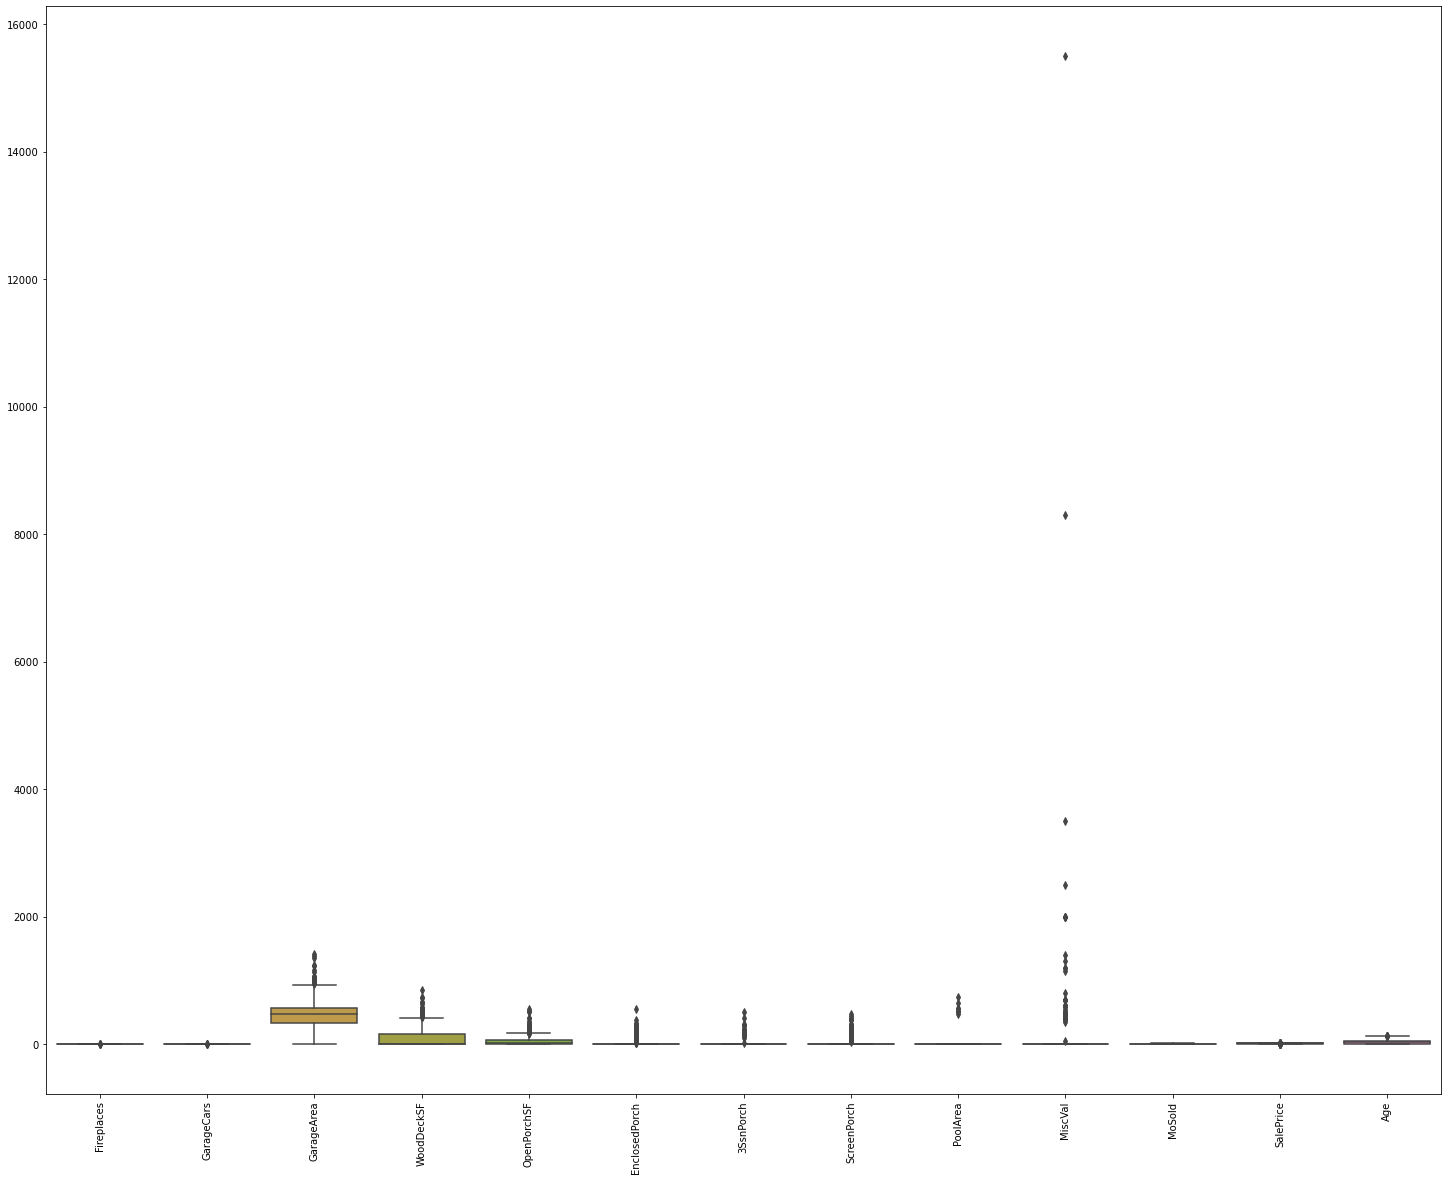

In [35]:
## Check the boxplots to view outliers in numerical columns
# print(len(df_num.columns))
plt.figure(figsize=[25,20])
plt.xticks(rotation=90)
# First 10 columns
sns.boxplot(data=df_num.iloc[:,0:10])
#Next 10 columns
plt.figure(figsize=[25,20])
plt.xticks(rotation=90)
sns.boxplot(data=df_num.iloc[:,10:20])
# remaining columns
plt.figure(figsize=[25,20])
plt.xticks(rotation=90)
sns.boxplot(data=df_num.iloc[:,20:])

In [36]:
## setting the outliers between 5% and 95%
for col in df_num.columns:
    df_num[col][df_num[col] <= df_num[col].quantile(0.05)] = df_num[col].quantile(0.05)
    df_num[col][df_num[col] >= df_num[col].quantile(0.95)] = df_num[col].quantile(0.95)

<AxesSubplot:>

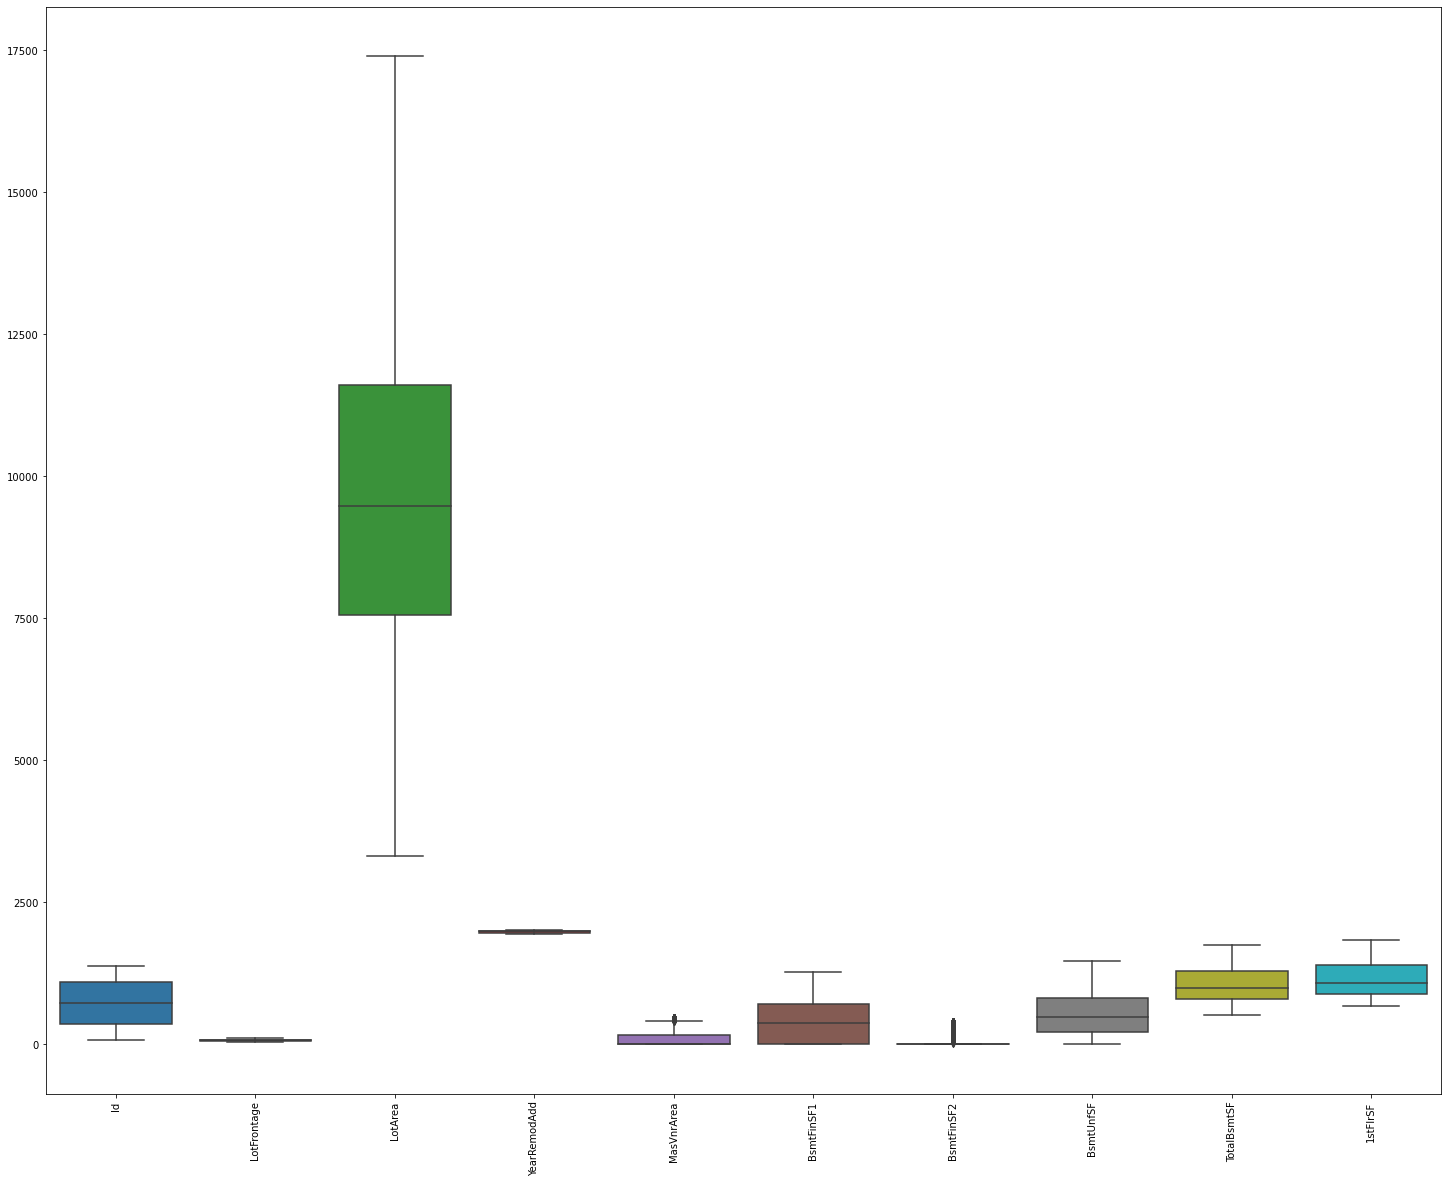

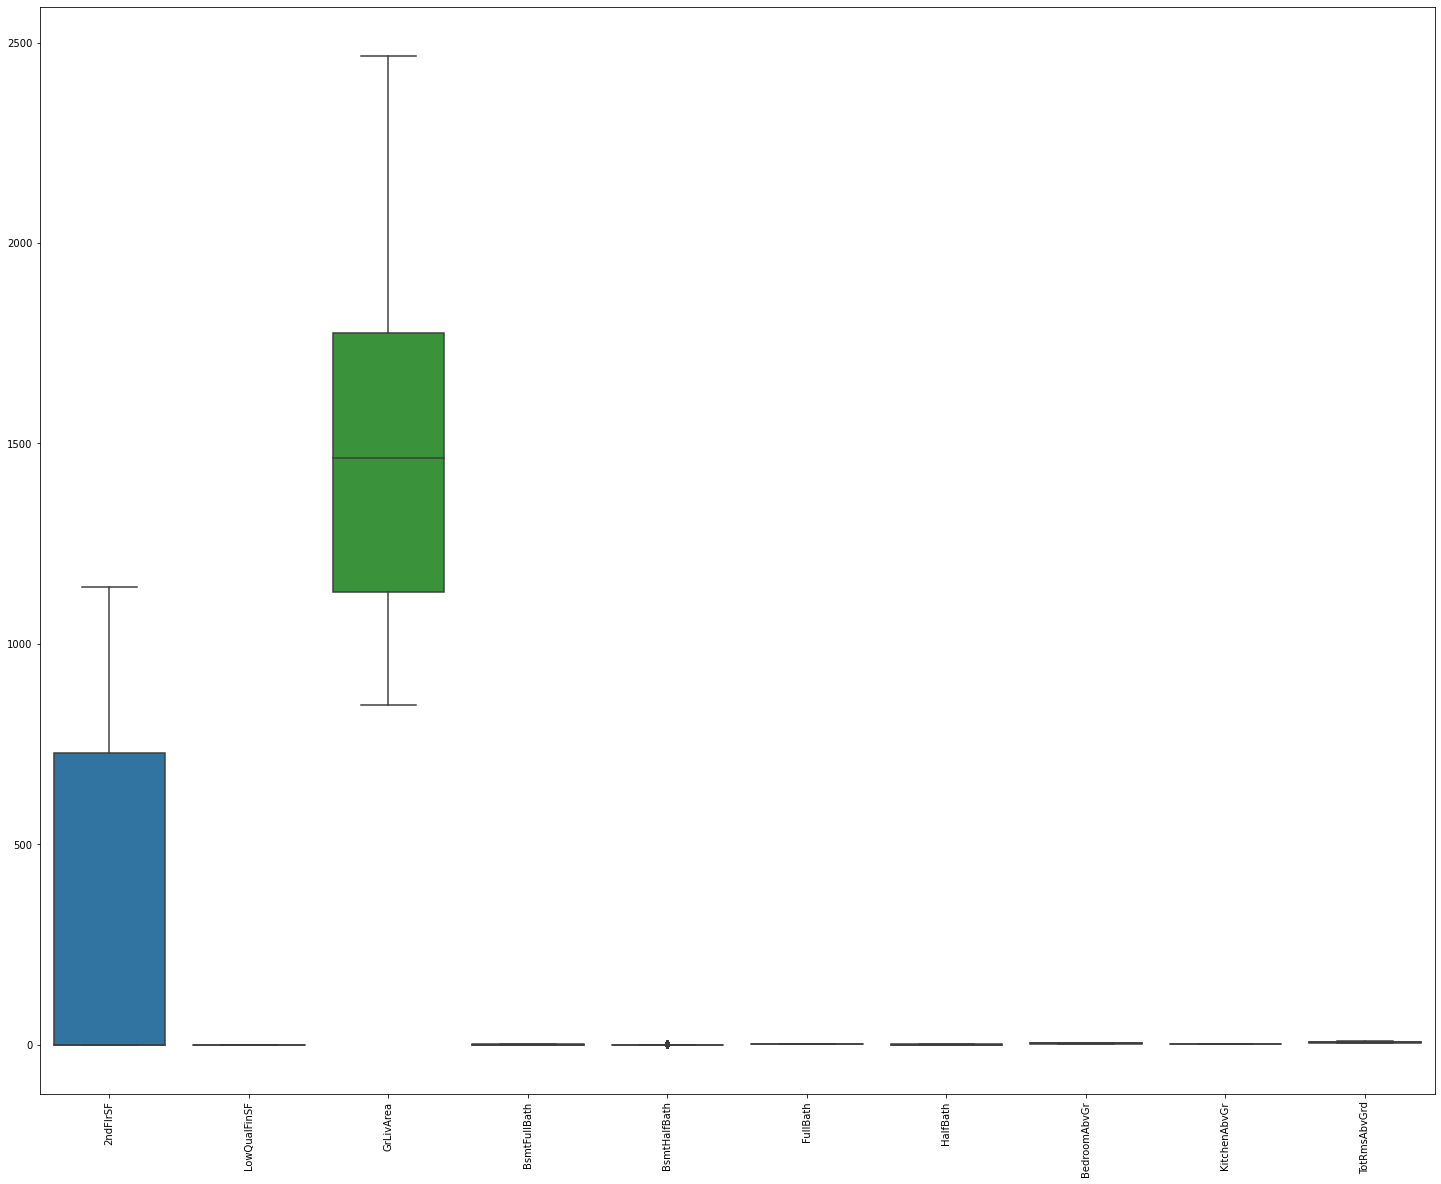

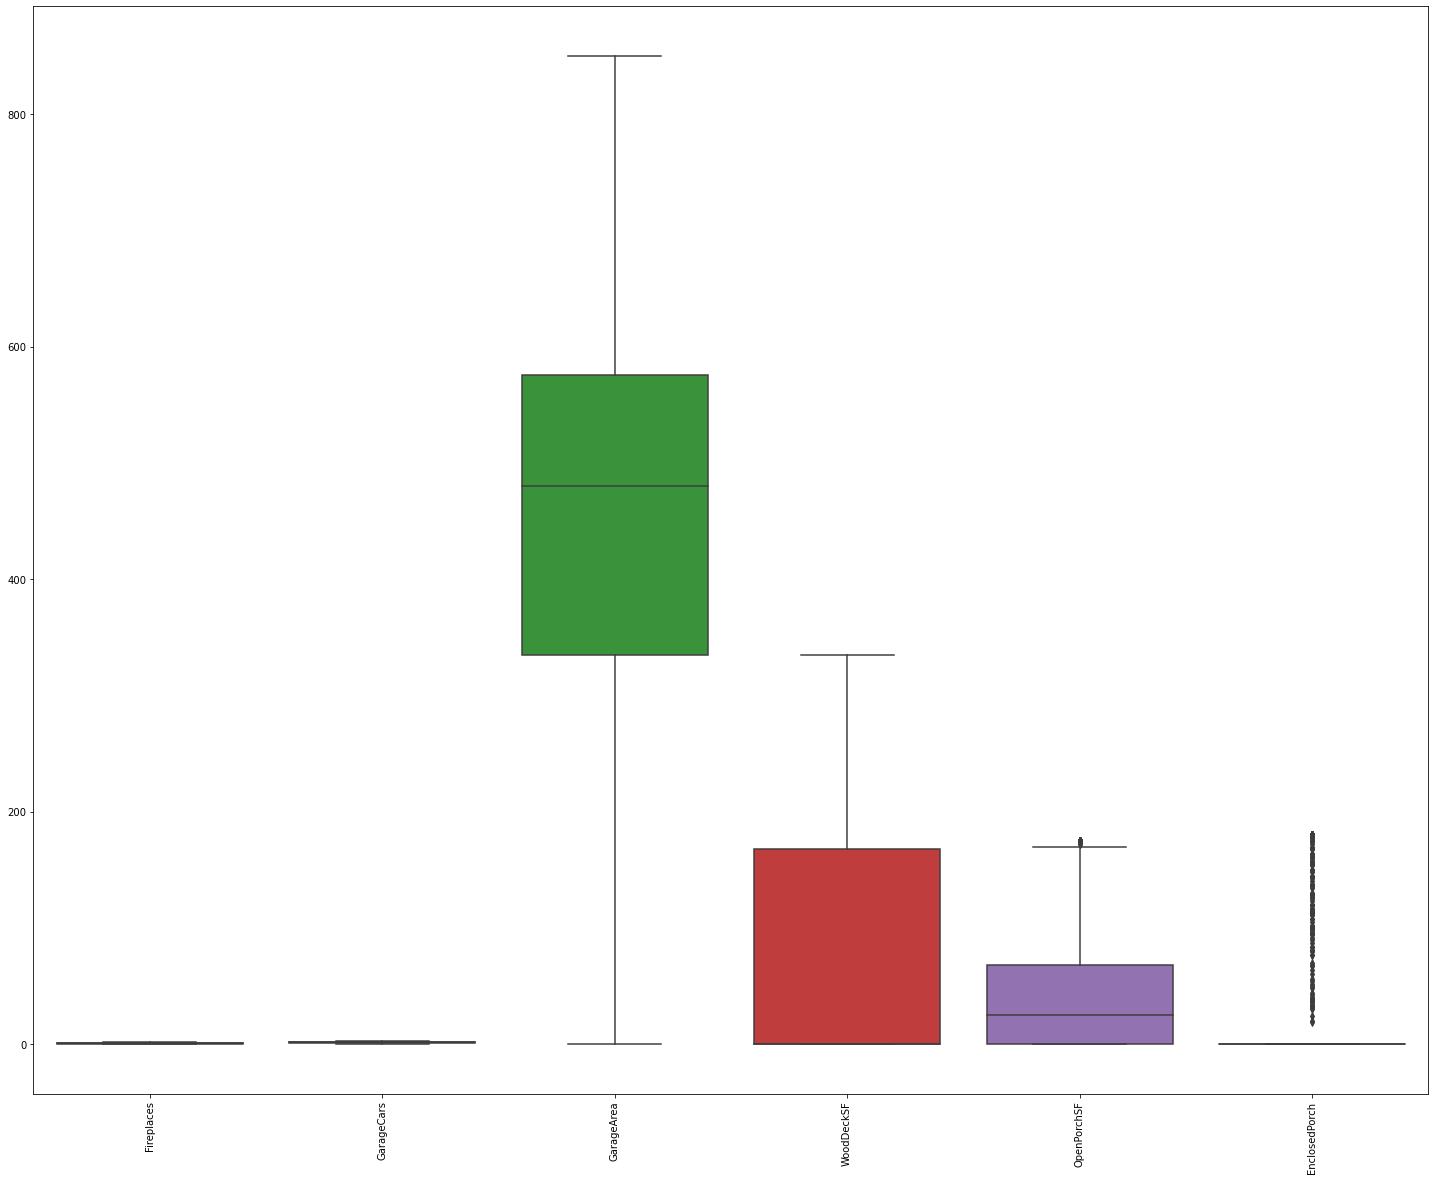

In [37]:
## Check the boxplots again to see if outliers have been treated

plt.figure(figsize=[25,20])
plt.xticks(rotation=90)
# First 10 columns
sns.boxplot(data=df_num.iloc[:,0:10])
#Next 10 columns
plt.figure(figsize=[25,20])
plt.xticks(rotation=90)
sns.boxplot(data=df_num.iloc[:,10:20])
# remaining columns
plt.figure(figsize=[25,20])
plt.xticks(rotation=90)
sns.boxplot(data=df_num.iloc[:,20:26])

<div class="alert alert-info" role="alert">
    <strong>Observation:</strong>
    <ul>
        <li>Outliers treatment seems to have worked fine.</li>
    </ul>
</div> 

In [38]:
## merge the updated numerical and categorical data frames in a new data frame 
df = pd.concat([df_num, df_cat_dummy], axis=1)
df.head()

,Id,LotFrontage,LotArea,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,Age,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_None,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_NA,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_NA,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageYrBlt_1906,GarageYrBlt_1908,GarageYrBlt_1910,GarageYrBlt_1914,GarageYrBlt_1915,GarageYrBlt_1916,

<div class="alert alert-info" role="alert">
    <strong>Observation:</strong>
    <ul>
        <li>Dataframe is now ready for model building</li>
    </ul>
</div>

<h2>5. Model Building, Tuning & Evaluation</h2>

<h3>Split the data into Dependent and Independent variables</h3>

In [39]:
## get all independent variables to make predictions 
## Drop 'Id' (not required) and target variable 'SalePrice'
X = df.drop(["Id", "SalePrice"], axis=1).copy()
X.head()

,LotFrontage,LotArea,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,Age,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_None,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_NA,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_NA,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageYrBlt_1906,GarageYrBlt_1908,GarageYrBlt_1910,GarageYrBlt_1914,GarageYrBlt_1915,GarageYrBlt_1916,GarageYrBlt_1

In [40]:
## get target variable "SalesPrice" on y
y = df.SalePrice.copy()
y.head()


0    12.247694
1    12.109011
2    12.317167
3    11.849398
4    12.429216
Name: SalePrice, dtype: float64

<h3>Train - Test Split</h3>

In [41]:
## Split the X and y into train and test - 70% and 30% respectively
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42, shuffle=True)

In [42]:
## check train data shape
print(X_train.shape)
print(y_train.shape)

(1022, 384)
(1022,)


In [43]:
## check test data shape
print(X_test.shape)
print(y_test.shape)

(438, 384)
(438,)


<h3>Scaling numerical columns</h3>

In [44]:
## Prepare a list of numerical columns for scaling
num_cols = list(X_train.select_dtypes(include=['int64', 'float64']).columns)
num_cols

['LotFrontage',
 'LotArea',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'Age']

In [45]:
## Create a scaling instance
## scaler = MinMaxScaler()
## X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
## X_test[num_cols] = scaler.transform(X_test[num_cols])

## rescale the numerical columns using StandardScaler
scaler = StandardScaler()
## fit_transform on train data
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

## transform on test data
X_test[num_cols] = scaler.transform(X_test[num_cols])


In [46]:
## Generic function to generate metrics for different models

def generate_metrics(y_train, y_train_pred, y_test, y_pred):
    
    ## Create a list to save all metrics (will be used in creating a final summary/comparison in the end)
    model_metric = []
    
    ## R-squared of train and test data, limit to 2 decimal places for display purpose only
    print("Train R-Squared: ", '%.2f' % r2_score(y_train, y_train_pred))
    model_metric.append(r2_score(y_train, y_train_pred))
    print("Test R-Squared: ", '%.2f' % r2_score(y_test, y_pred))
    model_metric.append(r2_score(y_test, y_pred))
    
    ## RSS of train and test data
    rss_train = np.sum(np.square(y_train - y_train_pred))
    model_metric.append(rss_train)
    rss_test = np.sum(np.square(y_test - y_pred))
    model_metric.append(rss_test)
    print("Train RSS: ", '%.2f' % rss_train)
    print("Test RSS: ", '%.2f' % rss_test)
    
    
    # RMSE for train and test data
    rmse_train = mean_squared_error(y_train, y_train_pred)**0.5
    model_metric.append(rmse_train)
    rmse_test = mean_squared_error(y_test, y_pred)**0.5
    model_metric.append(rmse_test)
    print("Train RMSE: ", '%.2f' % rmse_train) 
    print("Test RMSE: ", '%.2f' % rmse_test) 
    
    return model_metric

<h3><font color=green>Model 1: Ridge Regression</h3>

In [47]:
## Creating a Ridge Regression model
## Cross validation on a list of alphas to get the best alpha value 
## Alpha values - 0.0001 to 1000

params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
                    4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]}

ridge = Ridge()

# cross validation

ridgeCV = GridSearchCV(estimator = ridge, param_grid = params, scoring= 'neg_mean_absolute_error',  
                        cv = 5, return_train_score=True, verbose = 1, n_jobs=-1)  

ridgeCV.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [48]:
## get the best alpha value
ridgeCV.best_params_

{'alpha': 9.0}

In [49]:
## cross validation search result
ridgeCV.cv_results_

{'mean_fit_time': array([0.04764938, 0.04663544, 0.0425786 , 0.04337935, 0.0432898 ,
        0.03753943, 0.03442731, 0.03137341, 0.03165574, 0.03299975,
        0.03106699, 0.03386087, 0.03066654, 0.0336916 , 0.03087044,
        0.03222528, 0.02955241, 0.03612728, 0.03688769, 0.03755264,
        0.03590221, 0.03061123, 0.03199182, 0.03071575, 0.03503084,
        0.03093081, 0.03054805, 0.0265038 ]),
 'std_fit_time': array([0.00760218, 0.00551319, 0.00511677, 0.00406195, 0.0037124 ,
        0.00104819, 0.00435248, 0.00233641, 0.00266578, 0.00290577,
        0.00363851, 0.0045362 , 0.00240074, 0.00474319, 0.00303555,
        0.00206893, 0.00130383, 0.00631827, 0.00458892, 0.00878951,
        0.0030346 , 0.002295  , 0.00532027, 0.00376402, 0.00174167,
        0.00198262, 0.00143984, 0.0033218 ]),
 'mean_score_time': array([0.01016049, 0.00993061, 0.00905104, 0.0114922 , 0.01157041,
        0.00945354, 0.00817833, 0.00957966, 0.00836329, 0.00847139,
        0.00758705, 0.00924077, 0.007968

#### We got the best alpha value as 9.  Build a ridge regression model using this alpha value.

In [50]:
# Create a ridge regreesion instance with optimum value alpha=9
ridge = Ridge(alpha=9)

In [51]:
# Fit the model on training data
ridge.fit(X_train, y_train)

Ridge(alpha=9)

In [52]:
## View the coefficients of ridge regression fitted model
ridge.coef_

array([ 8.16498524e-03,  2.02662924e-02,  2.43720730e-02, -2.69691287e-03,
        1.15365416e-02,  5.68128991e-04, -1.59349189e-02,  5.05559206e-02,
        6.60089067e-03,  2.86135039e-02,  0.00000000e+00,  8.91623661e-02,
        6.04080639e-03, -1.90216895e-03,  1.11857794e-02,  1.09073987e-02,
        5.59989937e-03,  0.00000000e+00, -1.36879384e-03,  2.01507272e-02,
        2.26955020e-02,  1.04355498e-02,  1.26182887e-02,  7.96926470e-03,
        4.43300067e-03,  0.00000000e+00,  1.03307539e-02,  0.00000000e+00,
        0.00000000e+00,  1.68219375e-03, -5.18022688e-02, -3.25819160e-02,
        4.14059843e-03,  4.62876766e-03,  3.61202129e-04, -1.65926641e-04,
        4.61234285e-02,  3.35164797e-02, -6.44909609e-03,  2.52052087e-03,
       -3.62311969e-02, -3.85546528e-04, -4.67009617e-02, -7.19027819e-03,
       -2.27520942e-02,  3.32171125e-02,  1.16363781e-02,  1.77456618e-02,
       -2.44852421e-02, -7.28209325e-03, -1.19572932e-02,  3.21088746e-02,
        1.72822088e-02, -

In [53]:
## Make predictions
y_train_pred = ridge.predict(X_train)
y_pred = ridge.predict(X_test)

In [54]:
## Check metrics
ridge_metrics = generate_metrics(y_train, y_train_pred, y_test, y_pred)
# ridge_metrics

Train R-Squared:  0.94
Test R-Squared:  0.92
Train RSS:  7.36
Test RSS:  4.23
Train RMSE:  0.08
Test RMSE:  0.10


#### Check R2 Score against different values of alpha for both train and test sets on a graph

In [55]:
## get ridge cross validation results in a dataframe
ridgeCV_results= pd.DataFrame(ridgeCV.cv_results_)
ridgeCV_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.047649,0.007602,0.010160,0.002351,0.0001,{'alpha': 0.0001},-0.087308,-0.106128,-0.106200,-0.094571,-0.102895,-0.099420,0.007393,27,-0.047837,-0.045204,-0.046811,-0.047885,-0.048330,-0.047213,0.001121
1,0.046635,0.005513,0.009931,0.002291,0.001,{'alpha': 0.001},-0.087077,-0.104617,-0.104368,-0.094393,-0.100191,-0.098129,0.006654,26,-0.047872,-0.045252,-0.046832,-0.047908,-0.048355,-0.047244,0.001114
2,0.042579,0.005117,0.009051,0.001515,0.01,{'alpha': 0.01},-0.085745,-0.101609,-0.101164,-0.093148,-0.093518,-0.095037,0.005881,24,-0.048189,-0.045516,-0.047279,-0.048129,-0.048638,-0.047550,0.001108
3,0.043379,0.004062,0.011492,0.003542,0.05,{'alpha': 0.05},-0.084585,-0.099084,-0.097747,-0.090821,-0.088620,-0.092171,0.005493,23,-0.049211,-0.045847,-0.048413,-0.048794,-0.049303,-0.048314,0.001274
4,0.043290,0.003712,0.011570,0.002515,0.1,{'alpha': 0.1},-0.083418,-0.097570,-0.095213,-0.089227,-0.086430,-0.090372,0.005300,22,-0.049849,-0.046089,-0.049130,-0.049258,-0.049803,-0.048826,0.001398
5,0.037539,0.001048,0.009454,0.003547,0.2,{'alpha': 0.2},-0.081275,-0.096028,-0.091650,-0.087568,-0.084808,-0.088266,0.005158,21,-0.050560,-0.046435,-0.050041,-0.049803,-0.050449,-0.049458,0.001536
6,0.034427,0.004352,0.008178,0.001444,0.3,{'alpha': 0.3},-0.079784,-0.095164,-0.089274,-0.086583,-0.083585,-0.086878,0.005209,20,-0.051023,-0.046743,-0.050648,-0.050180,-0.050937,-0.049906,0.001609
7,0.031373,0.002336,0.009580,0.001707,0.4,{'alpha': 0.4},-0.078581,-0.094574,-0.087574,-0.085793,-0.082584,-0.085821,0.005340,19,-0.051387,-0.047035,-0.051127,-0.050468,-0.051344,-0.050272,0.001652
8,0.031656,0.002666,0.008363,0.001208,0.5,{'alpha': 0.5},-0.077620,-0.094075,-0.086250,-0.085152,-0.081754,-0.084970,0.005458,17,-0.051711,-0.047302,-0.051526,-0.050725,-0.051675,-0.050588,0.001682
9,0.033000,0.002906,0.008471,0.001614,0.6,{'alpha': 0.6},-0.076840,-0.093652,-0.085215,-0.084581,-0.081113,-0.084280,0.005553,16,-0.052008,-0.047542,-0.051866,-0.050953,-0.051971,-0.050868,0.001708


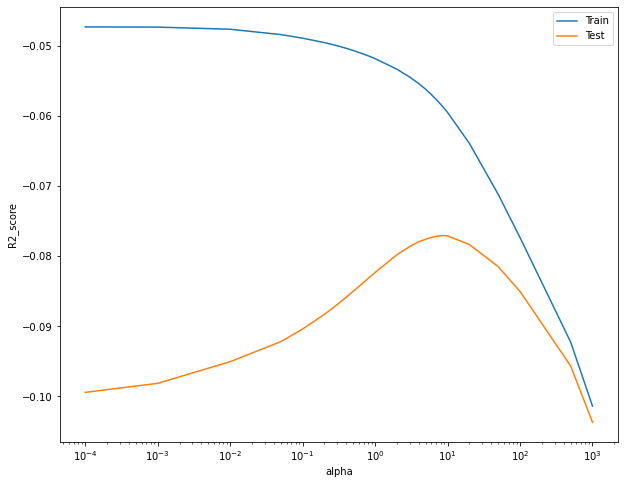

In [56]:
## R2 score vs alpha values plotting
plt.figure(figsize=[10,8])
plt.plot(ridgeCV_results['param_alpha'], ridgeCV_results['mean_train_score'], label='Train')
plt.plot(ridgeCV_results['param_alpha'], ridgeCV_results['mean_test_score'], label='Test')
plt.xlabel('alpha')
plt.ylabel('R2_score')
plt.xscale('log')
plt.legend()
plt.show()

<div class="alert alert-info">
    <strong>Observations:</strong>
    <ul>
        <li>Train error decreases as the alpha value increases</li>
        <li>Test error initially increases and then decreases</li>
    </ul>
</div>

<h3><font color=green>Model 2: Lasso Regression</font></h3>

In [57]:
## Creating a Lasso Regression model
## Cross validation on a list of alphas to get the best alpha value 
## Alpha values - 0.0001 to 1000

params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
                    4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]}
lasso = Lasso()
# cross validation
lassoCV = GridSearchCV(estimator = lasso, param_grid = params, scoring= 'neg_mean_absolute_error',  
                        cv = 5, return_train_score=True, verbose = 1, n_jobs=-1)

lassoCV.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


/Users/manishranjan/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.012674928698289456, tolerance: 0.010120535523913015
  model = cd_fast.enet_coordinate_descent(


GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [58]:
## Best value of alpha
lassoCV.best_params_

{'alpha': 0.001}

In [59]:
## Cross validation search results
lassoCV.cv_results_

{'mean_fit_time': array([0.37826304, 0.09281554, 0.04496255, 0.04390674, 0.03692737,
        0.0252398 , 0.02235198, 0.01933322, 0.01894541, 0.02109251,
        0.02007074, 0.01919513, 0.01817408, 0.01999259, 0.0177588 ,
        0.02071619, 0.0193491 , 0.02218618, 0.02170777, 0.01962667,
        0.01895113, 0.02114878, 0.02489414, 0.02150927, 0.01976957,
        0.02618413, 0.02298307, 0.016293  ]),
 'std_fit_time': array([0.12220029, 0.04192626, 0.00518272, 0.00467236, 0.00574168,
        0.00259364, 0.00213622, 0.00107232, 0.00256497, 0.0018485 ,
        0.00229355, 0.00225635, 0.00261022, 0.00169477, 0.00216065,
        0.00222621, 0.00086339, 0.00284306, 0.00099662, 0.00097143,
        0.00203061, 0.00201572, 0.00638485, 0.0018926 , 0.00154723,
        0.00285183, 0.002096  , 0.00363828]),
 'mean_score_time': array([0.00784559, 0.00924158, 0.01159282, 0.00884123, 0.00979252,
        0.00876498, 0.00846882, 0.00742788, 0.00714879, 0.00817838,
        0.00874877, 0.00737329, 0.007456

#### We got the best alpha value as 0.001.  Build a lasso regression model using this alpha value.

In [60]:
# Create a ridge regreesion instance with optimum value alpha=0.001
lasso = Lasso(alpha=0.001)

In [61]:
# Fit the model on training data
lasso.fit(X_train, y_train)

Lasso(alpha=0.001)

In [62]:
## View the coefficients of lasso fitted model
lasso.coef_

array([ 4.48955579e-03,  2.22438330e-02,  2.80898090e-02, -1.45878137e-04,
        2.55671666e-02,  1.96935025e-03, -2.15656169e-03,  4.13870499e-02,
       -0.00000000e+00,  8.98358874e-03,  0.00000000e+00,  1.06485125e-01,
        6.62069886e-03, -0.00000000e+00,  5.86661716e-03,  8.18371966e-03,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  2.44059785e-02,
        2.65830506e-02,  1.24346865e-02,  1.22622685e-02,  7.94366070e-03,
        3.86473209e-03,  0.00000000e+00,  1.11550579e-02,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -5.33459286e-02, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        3.09986498e-02,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -1.94721412e-02,  0.00000000e+00, -3.39992372e-02, -0.00000000e+00,
       -0.00000000e+00,  5.27127582e-04, -0.00000000e+00,  0.00000000e+00,
       -4.33578009e-02, -0.00000000e+00, -0.00000000e+00,  7.17551423e-03,
        1.32986490e-03, -

In [63]:
## Make predictions
y_train_pred = lasso.predict(X_train)
y_pred = lasso.predict(X_test)

In [64]:
## Check metrics
lasso_metrics = generate_metrics(y_train, y_train_pred, y_test, y_pred)
#lasso_metrics

Train R-Squared:  0.92
Test R-Squared:  0.93
Train RSS:  9.96
Test RSS:  4.11
Train RMSE:  0.10
Test RMSE:  0.10


#### Check R2 Score against different values of alpha for both train and test sets on a graph

In [65]:
## get lasso cross validation results into a dataframe
lassoCV_results= pd.DataFrame(lassoCV.cv_results_)
lassoCV_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.378263,0.122200,0.007846,0.001531,0.0001,{'alpha': 0.0001},-0.071212,-0.091680,-0.079977,-0.081301,-0.078191,-0.080472,0.006595,2,-0.054925,-0.050161,-0.054130,-0.053233,-0.053651,-0.053220,0.001630
1,0.092816,0.041926,0.009242,0.000312,0.001,{'alpha': 0.001},-0.072942,-0.094083,-0.074613,-0.081773,-0.073351,-0.079352,0.008030,1,-0.070924,-0.064704,-0.070917,-0.068908,-0.070185,-0.069128,0.002331
2,0.044963,0.005183,0.011593,0.002733,0.01,{'alpha': 0.01},-0.095752,-0.117109,-0.095673,-0.105403,-0.090657,-0.100919,0.009399,3,-0.099550,-0.093517,-0.100180,-0.097999,-0.100748,-0.098399,0.002608
3,0.043907,0.004672,0.008841,0.001925,0.05,{'alpha': 0.05},-0.118024,-0.134970,-0.129434,-0.126750,-0.110703,-0.123976,0.008602,4,-0.123773,-0.116817,-0.125071,-0.122537,-0.124335,-0.122507,0.002963
4,0.036927,0.005742,0.009793,0.001346,0.1,{'alpha': 0.1},-0.158841,-0.171162,-0.178396,-0.162916,-0.148523,-0.163968,0.010256,5,-0.165706,-0.157699,-0.164477,-0.162584,-0.164541,-0.163001,0.002834
5,0.025240,0.002594,0.008765,0.000723,0.2,{'alpha': 0.2},-0.252994,-0.255987,-0.276934,-0.249069,-0.234050,-0.253807,0.013806,6,-0.257094,-0.249442,-0.253193,-0.252013,-0.254227,-0.253194,0.002520
6,0.022352,0.002136,0.008469,0.000663,0.3,{'alpha': 0.3},-0.286919,-0.289490,-0.308826,-0.284870,-0.270722,-0.288165,0.012209,7,-0.287878,-0.287437,-0.283006,-0.288733,-0.292020,-0.287815,0.002891
7,0.019333,0.001072,0.007428,0.000758,0.4,{'alpha': 0.4},-0.286919,-0.289490,-0.308826,-0.284870,-0.270722,-0.288165,0.012209,7,-0.287878,-0.287437,-0.283006,-0.288733,-0.292020,-0.287815,0.002891
8,0.018945,0.002565,0.007149,0.000486,0.5,{'alpha': 0.5},-0.286919,-0.289490,-0.308826,-0.284870,-0.270722,-0.288165,0.012209,7,-0.287878,-0.287437,-0.283006,-0.288733,-0.292020,-0.287815,0.002891
9,0.021093,0.001848,0.008178,0.000554,0.6,{'alpha': 0.6},-0.286919,-0.289490,-0.308826,-0.284870,-0.270722,-0.288165,0.012209,7,-0.287878,-0.287437,-0.283006,-0.288733,-0.292020,-0.287815,0.002891


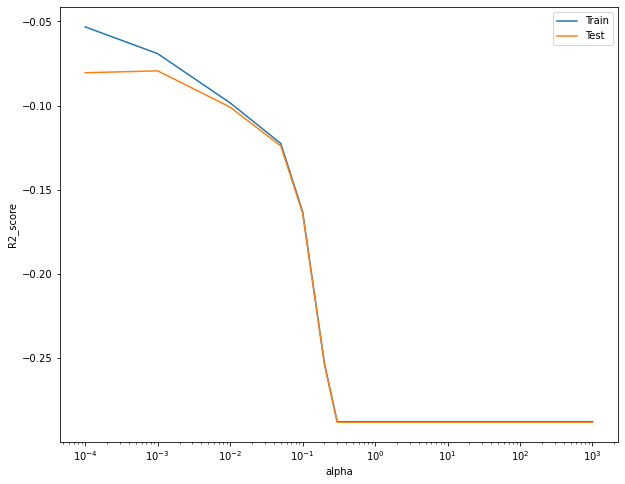

In [66]:
## R2 score vs alpha values plotting
plt.figure(figsize=[10,8])
plt.plot(lassoCV_results['param_alpha'], lassoCV_results['mean_train_score'], label='Train')
plt.plot(lassoCV_results['param_alpha'], lassoCV_results['mean_test_score'], label='Test')
plt.xlabel('alpha')
plt.ylabel('R2_score')
plt.xscale('log')
plt.legend()
plt.show()

<div class="alert alert-info">
    <strong>Observations:</strong>
    <ul>
        <li>Train and Test errors decrease as the alpha value increases</li>
        <li>Error remains constant after a certain error value</li>
    </ul>
</div>

<h2>6. Comparing Ridge and Lasso Models</h2>

In [67]:
# Store Ridge and Lasso metrics in a dataframe
comparision_table = {'Metric': ['R2 Score - Train','R2 Score - Test','RSS - Train','RSS - Test',
                       'RMSE - Train', 'RMSE - Test'],
            'Ridge Regression - Optimal Alpha' : ridge_metrics,
            'Lasso Regression - Optimal Alpha' : lasso_metrics
        }

final_metric = pd.DataFrame(comparision_table, columns = ['Metric', 'Ridge Regression - Optimal Alpha', 'Lasso Regression - Optimal Alpha'] )
final_metric.set_index('Metric')

,Ridge Regression - Optimal Alpha,Lasso Regression - Optimal Alpha
Metric,,
R2 Score - Train,0.941703,0.921100
R2 Score - Test,0.923529,0.925589
RSS - Train,7.357142,9.957260
RSS - Test,4.226648,4.112797
RMSE - Train,0.084846,0.098706
RMSE - Test,0.098234,0.096902


<div class="alert alert-info">
<strong>Observation:</strong> The R2 score on test data is slightly higher for Lasso model. RSS and RMSE on test data set are slightly lower for Lasso model.
</div>

In [68]:
## Check the coefficients after regularization
betas = pd.DataFrame(index=X.columns)
betas.rows = X.columns
betas

""
LotFrontage
LotArea
YearRemodAdd
MasVnrArea
BsmtFinSF1
BsmtFinSF2
BsmtUnfSF
TotalBsmtSF
1stFlrSF
2ndFlrSF


In [69]:
## Fill in the values of betas with ridge and lasso coefficients
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [70]:
## View the coefficients
betas

,Ridge,Lasso
LotFrontage,0.008165,0.004490
LotArea,0.020266,0.022244
YearRemodAdd,0.024372,0.028090
MasVnrArea,-0.002697,-0.000146
BsmtFinSF1,0.011537,0.025567
BsmtFinSF2,0.000568,0.001969
BsmtUnfSF,-0.015935,-0.002157
TotalBsmtSF,0.050556,0.041387
1stFlrSF,0.006601,-0.000000
2ndFlrSF,0.028614,0.008984


In [71]:
## View the features removed by Lasso
betas[betas['Lasso']==0]

,Ridge,Lasso
1stFlrSF,0.006601,-0.0
LowQualFinSF,0.000000,0.0
BsmtHalfBath,-0.001902,-0.0
BedroomAbvGr,0.005600,0.0
KitchenAbvGr,0.000000,0.0
TotRmsAbvGrd,-0.001369,-0.0
3SsnPorch,0.000000,0.0
PoolArea,0.000000,0.0
MiscVal,0.000000,0.0
MoSold,0.001682,0.0


In [72]:
## number of features removed by lasso
print(betas[betas['Lasso']==0].shape)
print(betas.shape)

(303, 2)
(384, 2)


<div class="alert alert-info">
    <strong>Observation:</strong>
    <ul>
        <li>Lasso performed feature selection by removing 303 features out of 384 (from X_train)</li>
    </ul>
</div>

In [73]:
## Features selected by lasso
betas.loc[betas['Lasso']!=0, 'Lasso']

LotFrontage              0.004490
LotArea                  0.022244
YearRemodAdd             0.028090
MasVnrArea              -0.000146
BsmtFinSF1               0.025567
BsmtFinSF2               0.001969
BsmtUnfSF               -0.002157
TotalBsmtSF              0.041387
2ndFlrSF                 0.008984
GrLivArea                0.106485
BsmtFullBath             0.006621
FullBath                 0.005867
HalfBath                 0.008184
Fireplaces               0.024406
GarageCars               0.026583
GarageArea               0.012435
WoodDeckSF               0.012262
OpenPorchSF              0.007944
EnclosedPorch            0.003865
ScreenPorch              0.011155
Age                     -0.053346
MSSubClass_70            0.030999
MSSubClass_90           -0.019472
MSSubClass_160          -0.033999
MSZoning_FV              0.000527
MSZoning_RM             -0.043358
Alley_Pave               0.007176
LotShape_IR2             0.001330
LotShape_Reg            -0.002100
LandContour_HL

<h2>7. Conclusion</h2>

### Top 10 features significant in predicting the value of a house using Ridge and Lasso models

In [74]:
## Top 10 coefficients of Ridge and Lasso regression
## betas['Ridge'].sort_values(ascending=False)[:10]
## betas['Lasso'].sort_values(ascending=False)[:10]

In [75]:
## Inverse log of the coefficients to interpret with respect to target
ridge_coeffs = np.exp(betas['Ridge'])
lasso_coeffs = np.exp(betas['Lasso'])
print("Top 10 features from Ridge model:")
print(ridge_coeffs.sort_values(ascending=False)[:10])
print("Top 10 features from Lasso model:")
print(lasso_coeffs.sort_values(ascending=False)[:10])

Top 10 features from Ridge model:
GrLivArea               1.093258
OverallQual_9           1.087365
OverallQual_8           1.085560
Neighborhood_Crawfor    1.080948
OverallCond_9           1.076815
Exterior1st_BrkFace     1.071014
Functional_Typ          1.070265
SaleCondition_Alloca    1.061167
Condition2_Norm         1.055739
BsmtCond_Gd             1.053800
Name: Ridge, dtype: float64
Top 10 features from Lasso model:
OverallQual_9           1.142032
OverallQual_8           1.117671
GrLivArea               1.112361
Neighborhood_Crawfor    1.092293
Functional_Typ          1.080535
Exterior1st_BrkFace     1.078526
CentralAir_Y            1.043839
Neighborhood_Somerst    1.042888
TotalBsmtSF             1.042255
Condition1_Norm         1.042173
Name: Lasso, dtype: float64


<div class="alert alert-success">
    <strong><h3>Conclusion:</h3></strong>
    <ul>
        <li>Singificant features for prediction are - GrLivArea, OverallQual_9, OverallQual_8, Neighborhood_Crawfor, Functional_Typ, OverallCond_9, Exterior1st_BrkFace, TotalBsmtSF, Neighborhood_Somerst and CentralAir_Y</li>
        <li>Some readings from the above: 
            <ul>
                <li>GrLivArea: An increase of 1 sqft of the living area will increase the sale price by 1.09 (Ridge) to 1.11 (Lasso) times</li>
                <li>Neighborhood_Crawfor: If Crawford is a nearby location to a house, the sale price of house will increase by 1.07 to 1.09 times </li>
                <li>OverallQual_8: If the overall material and finish of the house is "Very Good", the sale price will increase by 1.08 to 1.11 times. In case of OverallQual_9 ("Excellent"), the sale price will increase by 1.08 to 1.14</li>
                <li>Functional_Typ: For a house with "Typical Functionality", the sale price will increase by 1.06 to 1.08 times</li>
                <li>Exterior1st_BrkFace: For a house with "Brick Face" exterior covering, the sale price will increase by 1.06 to 1.07 times.</li>
                <li>TotalBsmtSF: An increase of 1 sqft of basement area will increase the sale price by 1.04 times</li>
            </ul>
        </li>
        <li>Optimal Lambda Value
            <ul>
                <li>Ridge: 9</li>
                <li>Lasso: 0.001</li>
            </ul>
        </li>
    </ul>
</div>

<h2>8. Code for subjective questions</h2>

## For Question 1

- Changes in the model if you choose double the value of alpha for both ridge and lasso
- Most important predictor variables with double the value of alpha

### Build the models by doubling the alpha value for both Ridge and Lasso

In [76]:
## Set alpha value to 18 for Ridge
ridge = Ridge(alpha=18)
# Fit the model on training data
ridge.fit(X_train, y_train)

Ridge(alpha=18)

In [77]:
## Make predictions
y_train_pred = ridge.predict(X_train)
y_pred = ridge.predict(X_test)

In [78]:
## Check metrics
ridge_metrics_2xalpha = generate_metrics(y_train, y_train_pred, y_test, y_pred)

Train R-Squared:  0.94
Test R-Squared:  0.93
Train RSS:  8.18
Test RSS:  4.08
Train RMSE:  0.09
Test RMSE:  0.10


In [79]:
## Set alpha value to 0.002 for Lasso
lasso = Lasso(alpha=0.002)

# Fit the model on training data
lasso.fit(X_train, y_train)

Lasso(alpha=0.002)

In [80]:
## Make predictions
y_train_pred = lasso.predict(X_train)
y_pred = lasso.predict(X_test)

In [81]:
## Check metrics
lasso_metrics_2xalpha = generate_metrics(y_train, y_train_pred, y_test, y_pred)

Train R-Squared:  0.90
Test R-Squared:  0.91
Train RSS:  12.01
Test RSS:  4.81
Train RMSE:  0.11
Test RMSE:  0.10


In [82]:
# comparision_table = {'Metric': ['R2 Score - Train','R2 Score - Test','RSS - Train','RSS - Test',
#                       'RMSE - Train', 'RMSE - Test'],
#            'Ridge Regression' : ridge_metrics_2xalpha,
#            'Lasso Regression' : lasso_metrics_2xalpha
#        }

final_metric["Ridge_2xAlpha"] = ridge_metrics_2xalpha
final_metric["Lasso_2xAlpha"] = lasso_metrics_2xalpha

final_metric.set_index('Metric')

,Ridge Regression - Optimal Alpha,Lasso Regression - Optimal Alpha,Ridge_2xAlpha,Lasso_2xAlpha
Metric,,,,
R2 Score - Train,0.941703,0.921100,0.935152,0.904797
R2 Score - Test,0.923529,0.925589,0.926122,0.912954
RSS - Train,7.357142,9.957260,8.183789,12.014664
RSS - Test,4.226648,4.112797,4.083318,4.811163
RMSE - Train,0.084846,0.098706,0.089485,0.108425
RMSE - Test,0.098234,0.096902,0.096554,0.104806


<div class="alert alert-info">
    <strong>Observations with 2x Alpha value:</strong>
    <ul>
        <li>Changes in Ridge metrics:
            <ul>
                <li>Train set R2 decreased from 0.94 to 0.93</li>
                <li>Slight increase in Test set R2</li>
            </ul>
        </li>
        <li>Changes in Lasso metrics
            <ul>
                <li>Train set R2 decreased from 0.92 to 0.90</li>
                <li>Test set R2 decreased from 0.92 to 0.91</li>
            </ul>
        </li>
    </ul>
 </div>

In [83]:
## Check the coefficients after regularization
betas = pd.DataFrame(index=X.columns)
betas.rows = X.columns
betas

""
LotFrontage
LotArea
YearRemodAdd
MasVnrArea
BsmtFinSF1
BsmtFinSF2
BsmtUnfSF
TotalBsmtSF
1stFlrSF
2ndFlrSF


In [84]:
## Fill in the values of betas with ridge and lasso coefficients
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [85]:
## View the coefficients
betas

,Ridge,Lasso
LotFrontage,0.008070,0.003472
LotArea,0.020958,0.025761
YearRemodAdd,0.027052,0.036409
MasVnrArea,-0.001644,-0.000000
BsmtFinSF1,0.017339,0.029596
BsmtFinSF2,0.002235,0.000686
BsmtUnfSF,-0.010295,-0.000000
TotalBsmtSF,0.046551,0.041940
1stFlrSF,0.012702,-0.000000
2ndFlrSF,0.030820,0.003465


### Top 10 significant features using Ridge and Lasso models with doubled alpha value

In [86]:
## Top 10 coefficients of Ridge and Lasso regression
## betas['Ridge'].sort_values(ascending=False)[:10]
## betas['Lasso'].sort_values(ascending=False)[:10]

## Inverse log of the coefficients to interpret with respect to target
ridge_coeffs = np.exp(betas['Ridge'])
lasso_coeffs = np.exp(betas['Lasso'])
print(ridge_coeffs.sort_values(ascending=False)[:10])
print(lasso_coeffs.sort_values(ascending=False)[:10])

GrLivArea               1.084270
OverallQual_8           1.077230
OverallQual_9           1.070335
Neighborhood_Crawfor    1.067598
Functional_Typ          1.064058
Exterior1st_BrkFace     1.059916
OverallCond_9           1.053915
TotalBsmtSF             1.047651
OverallCond_7           1.046220
CentralAir_Y            1.045070
Name: Ridge, dtype: float64
GrLivArea               1.114458
OverallQual_8           1.100773
OverallQual_9           1.090313
Functional_Typ          1.073542
Neighborhood_Crawfor    1.071182
Exterior1st_BrkFace     1.043135
TotalBsmtSF             1.042832
CentralAir_Y            1.038244
Condition1_Norm         1.037556
YearRemodAdd            1.037080
Name: Lasso, dtype: float64


<div class="alert alert-info">
    <strong>Most important predictor variables after we doubled the alpha values are:</strong>
    
- GrLivArea
- OverallQual_8
- OverallQual_9
- Functional_Typ
- Neighborhood_Crawfor
- Exterior1st_BrkFace
- TotalBsmtSF
- CentralAir_Y
    
</div>

## For Question 3

After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

### Solution 

- Build lasso model after dropping the top 5 features

Top 5 Lasso predictors were: 
              
- OverallQual_8
- OverallQual_9
- GrLivArea 
- Neighborhood_Crawfor
- Functional_Typ

In [87]:
## List of top 5 lasso predictors that are to be removed
top5 = [ 'OverallQual_8', 'OverallQual_9', 'GrLivArea',  'Neighborhood_Crawfor','Functional_Typ']

In [88]:
## drop them from train and test data
X_train_dropped = X_train.drop(top5, axis=1)
X_test_dropped = X_test.drop(top5, axis=1)

In [89]:
## Creating a Lasso Regression model
## Cross validation on a list of alphas to get the best alpha value 
## Alpha values - 0.0001 to 1000

params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
                    4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]}

lasso = Lasso()


# cross validation
lassoCV = GridSearchCV(estimator = lasso, param_grid = params, scoring= 'neg_mean_absolute_error',  
                        cv = 5, return_train_score=True, verbose = 1, n_jobs=-1)  

lassoCV.fit(X_train_dropped, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [90]:
## View the optimal value of alpha
lassoCV.best_params_

{'alpha': 0.001}

#### We got the optimum value of alpha as 0.001. Build a lasso regression model using this value.

In [91]:
# Fit the model on training data
lasso = Lasso(alpha=0.001)
lasso.fit(X_train_dropped, y_train)

## Make predictions
y_train_pred = lasso.predict(X_train_dropped)
y_pred = lasso.predict(X_test_dropped)
## get metrics
lasso_metrics = generate_metrics(y_train, y_train_pred, y_test, y_pred)
X_train_dropped.shape

Train R-Squared:  0.91
Test R-Squared:  0.92
Train RSS:  11.09
Test RSS:  4.31
Train RMSE:  0.10
Test RMSE:  0.10


(1022, 379)

#### Get the top 5 predictors

In [92]:
# store all the metrics

comparision_table = {'Metric': ['R2 Score - Train','R2 Score - Test','RSS - Train','RSS - Test',
                    'RMSE - Train', 'RMSE - Test'],
            'Lasso Regression' : lasso_metrics
       }

final_metric = pd.DataFrame(comparision_table, columns = ['Metric', 'Lasso Regression'] )
final_metric.set_index('Metric')

,Lasso Regression
Metric,
R2 Score - Train,0.912153
R2 Score - Test,0.922109
RSS - Train,11.086281
RSS - Test,4.305132
RMSE - Train,0.104152
RMSE - Test,0.099142


In [93]:
## Check the coefficients after regularization
betas = pd.DataFrame(index=X_train_dropped.columns)
betas.rows = X_train_dropped.columns
betas

""
LotFrontage
LotArea
YearRemodAdd
MasVnrArea
BsmtFinSF1
BsmtFinSF2
BsmtUnfSF
TotalBsmtSF
1stFlrSF
2ndFlrSF


In [94]:
## Fill in the values of betas with lasso coefficients
betas['Lasso'] = lasso.coef_

In [95]:
## View the betas/coefficients
betas 

,Lasso
LotFrontage,0.006159
LotArea,0.022334
YearRemodAdd,0.028141
MasVnrArea,0.001534
BsmtFinSF1,0.027701
BsmtFinSF2,0.001680
BsmtUnfSF,-0.000000
TotalBsmtSF,0.050578
1stFlrSF,0.062736
2ndFlrSF,0.098531


#### Top 5 features as per the new lasso model

In [96]:
## View the top 5 coefficients of Lasso in descending order
betas['Lasso'].sort_values(ascending=False)[:5]

2ndFlrSF                0.098531
Exterior1st_BrkFace     0.092450
MSSubClass_70           0.062943
1stFlrSF                0.062736
Neighborhood_Somerst    0.056222
Name: Lasso, dtype: float64

#### After dropping our top 5 lasso predictors from previous model, we get the following new top 5 predictors:-

- 2ndFlrSF
- Exterior1st_BrkFace
- MSSubClass_70
- 1stFlrSF
- Neighborhood_Somerst